# RCFM Model

## 1. Import modules and helper functions

In [1]:
# Modules
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt
from scipy.optimize import curve_fit

# Helper functions from DataAid.py and DataImport.py
import DataAid
import DataImporter

# Numerically stable class of functions from Neros_v2.py
import Neros

## 2. Load Galaxy Data

In [2]:
# Load Galaxy Data
sparcGalaxies = DataAid.GetGalaxyData("data/Sparc/Rotmod_LTG/")
sparc128Galaxies = DataAid.GetGalaxyData("data/Sparc/SparcSubset135/")
sparcTset = DataAid.GetGalaxyData("data/Sparc/TrainingSet/")
littleDataGalaxies = DataAid.GetGalaxyData("data/little-data-things/data/")
lcmGalaxies = DataAid.GetGalaxyData("data/LCMFits/data/")

# Load Milky Way Model Data
xueSofueGalaxies = DataAid.GetGalaxyData("data/XueSofue/")
mcGaughMW = DataAid.GetGalaxyData("data/McGaugh/")

# Create array of Milky Way radius and vlum tuples from model data
MWXueSofue = np.array(xueSofueGalaxies['MW_lum'])
MWMcGaugh = np.array(mcGaughMW['MW_lumMcGaugh'])


## 3. Create Neros class instance

In [3]:
# Create Neros instance to perform calculations with the supplied Milky Way model as comparison
# Change Milky Way model by changing the variable in the parentheses
# i.e. neros_fns = Neros_v2.Neros(MWModelVariable)

neros_fns = Neros.Neros(MWXueSofue)
MW_name = "XueSofue" # Change this if you change the MW model in neros_fns!
MW_rad = neros_fns.mw_rad
MW_vLum = neros_fns.mw_vLum
#MW_phi = neros_fns.mw_phi

MW_vLum_interp_func = neros_fns.mw_vLum_interp

## 4. Designate outfile name, initialize variables, and designate galaxy sample

In [4]:
# This designates which galaxy sample to fit
galaxies = sparcTset


## 5. Fit galaxies, print and save graphs

/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


galaxyName is: UGCA442_rotmod
chi_squared is: 0.5466642356898719
alpha is: 152.05821508487142
disk_scale is: 2.285282453135278
bulge_scale is: 1.0
phi_zero is: 2.8647946796093216e-06
--------------------------
Running average chi_squared: 0.5466642356898719
Optimal parameters not found: Number of calls to function has reached maxfev = 10000.
ERROR! Fit for UGC04305_rotmod failed
--------------------------
galaxyName is: NGC2841_rotmod
chi_squared is: 1.2985963538033733
alpha is: 1.1956022283969323
disk_scale is: 0.8692782221867209
bulge_scale is: 1.105082493591135
phi_zero is: 3.985111620249881e-06
--------------------------
Running average chi_squared: 0.9226302947466226
galaxyName is: UGC07232_rotmod
chi_squared is: 0.18929858270893876
alpha is: 938.6234703493917
disk_scale is: 0.8198853539142812
bulge_scale is: 1.0
phi_zero is: 2.3682255868199998e-06
--------------------------
Running average chi_squared: 0.6781863907340613
galaxyName is: NGC4068_rotmod
chi_squared is: 0.13762586566

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


galaxyName is: UGC04483_rotmod
chi_squared is: 0.32552979434541135
alpha is: 606.861933869397
disk_scale is: 1.2775254551080106
bulge_scale is: 1.0
phi_zero is: 2.8647946796093216e-06
--------------------------
Running average chi_squared: 1.4955574479194578
galaxyName is: NGC0055_rotmod
chi_squared is: 2.507741217734167
alpha is: 61.65532005004232
disk_scale is: 1.0161242766059693
bulge_scale is: 1.0
phi_zero is: 3.558005140268911e-06
--------------------------
Running average chi_squared: 1.5415658010928537
galaxyName is: NGC2403_rotmod
chi_squared is: 10.202691621237168
alpha is: 11.3257302793404
disk_scale is: 0.8646412374122358
bulge_scale is: 1.0
phi_zero is: 4.103703637097236e-06
--------------------------
Running average chi_squared: 1.918136488925215
galaxyName is: ESO444-G084_rotmod
chi_squared is: 0.21441828541564784
alpha is: 271.4263435047869
disk_scale is: 1.8676596609676084
bulge_scale is: 1.0
phi_zero is: 2.7697701267296215e-06
--------------------------
Running average

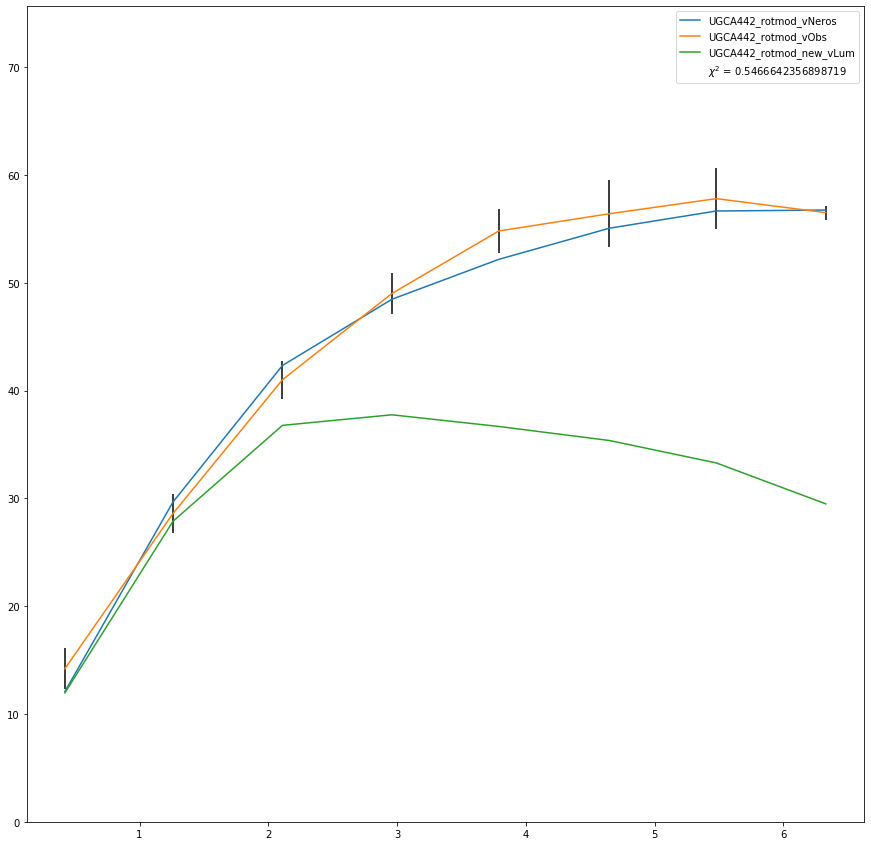

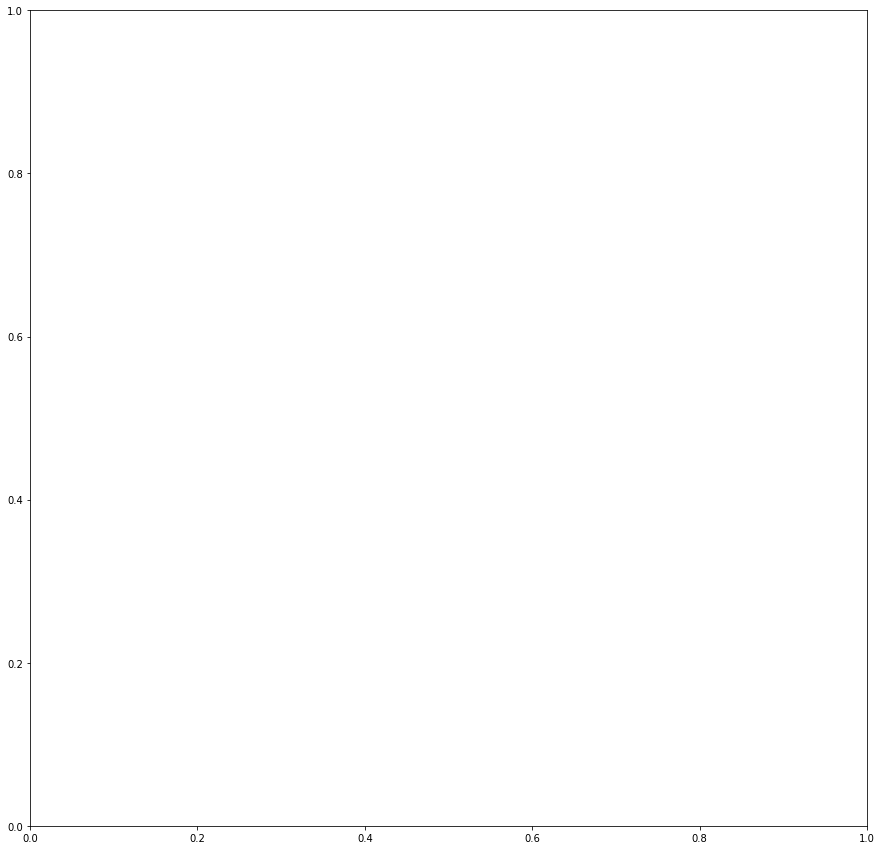

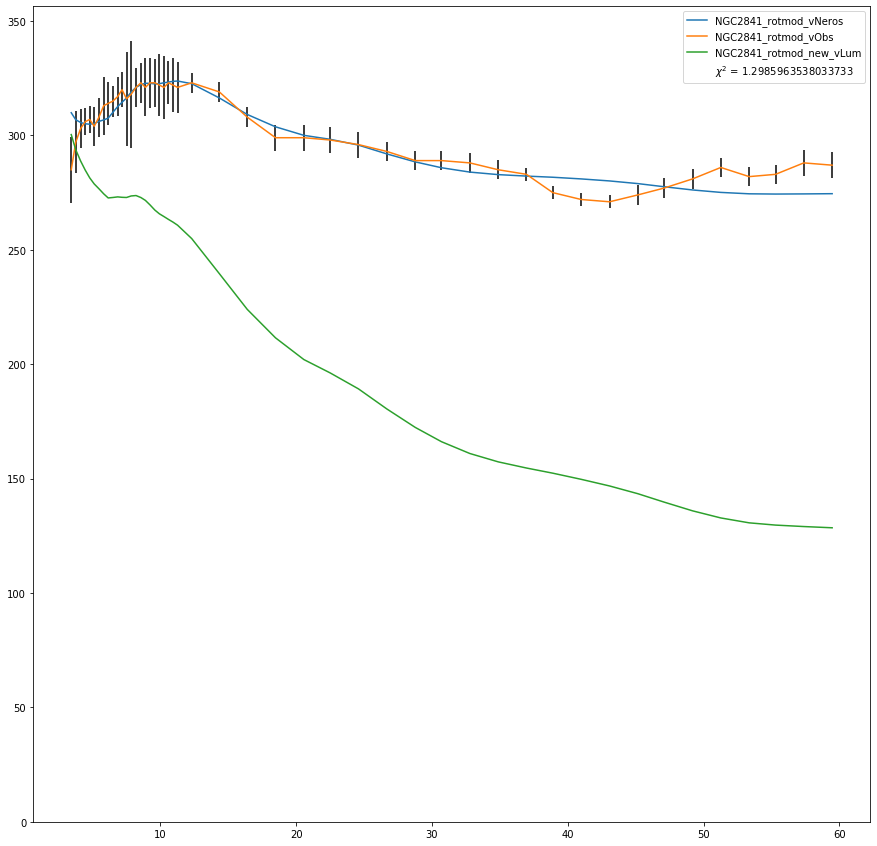

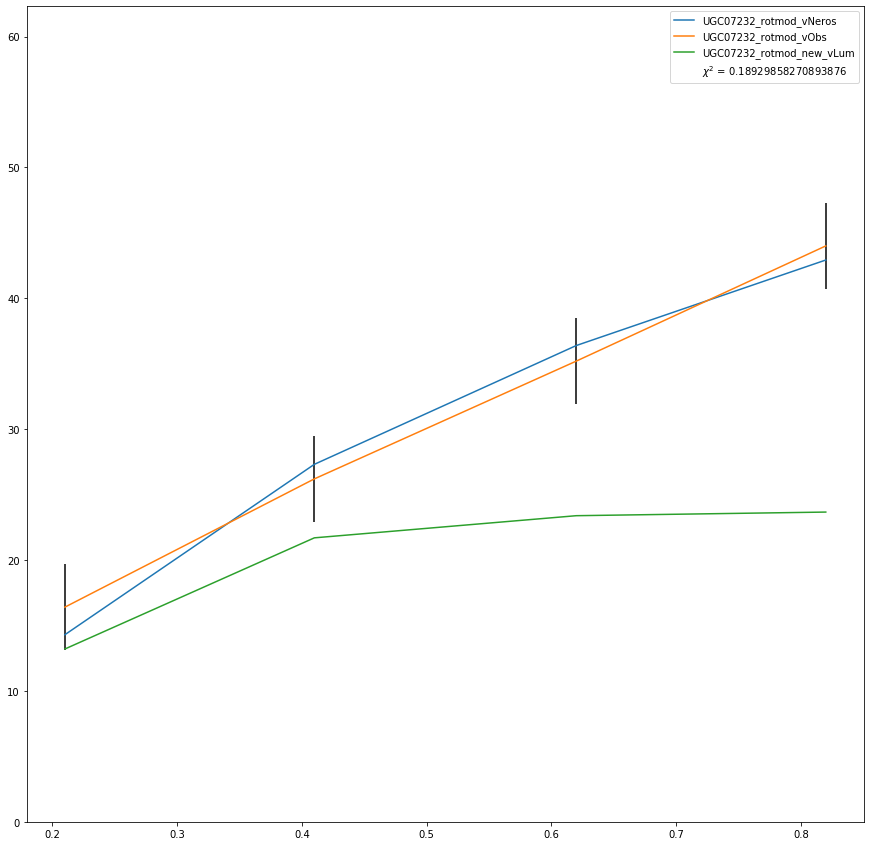

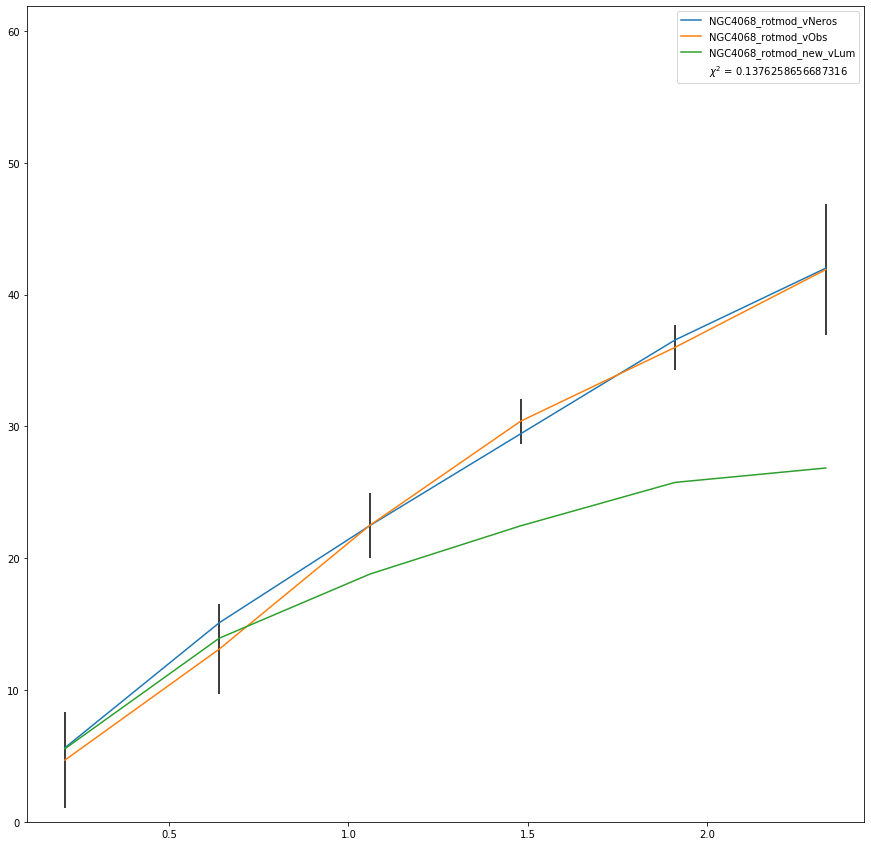

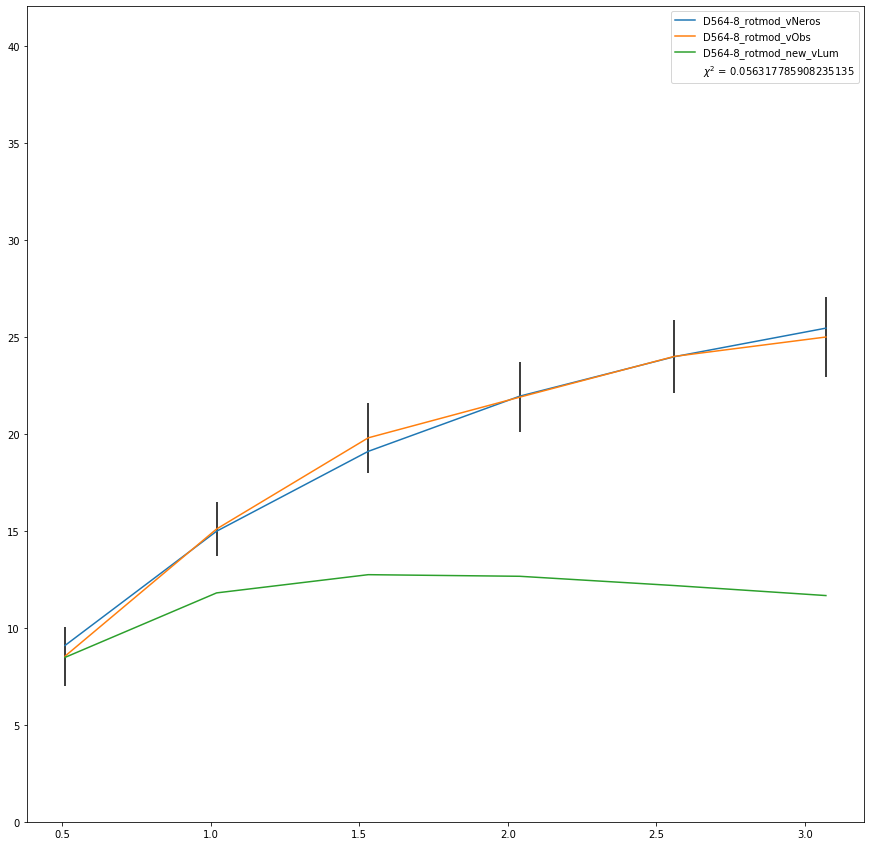

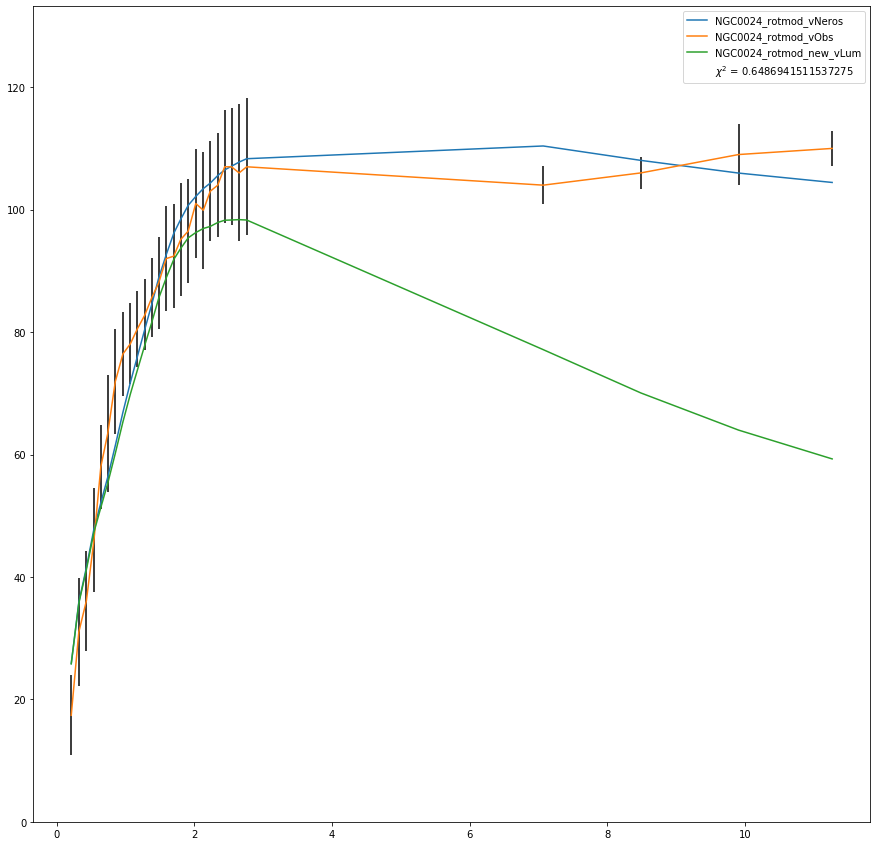

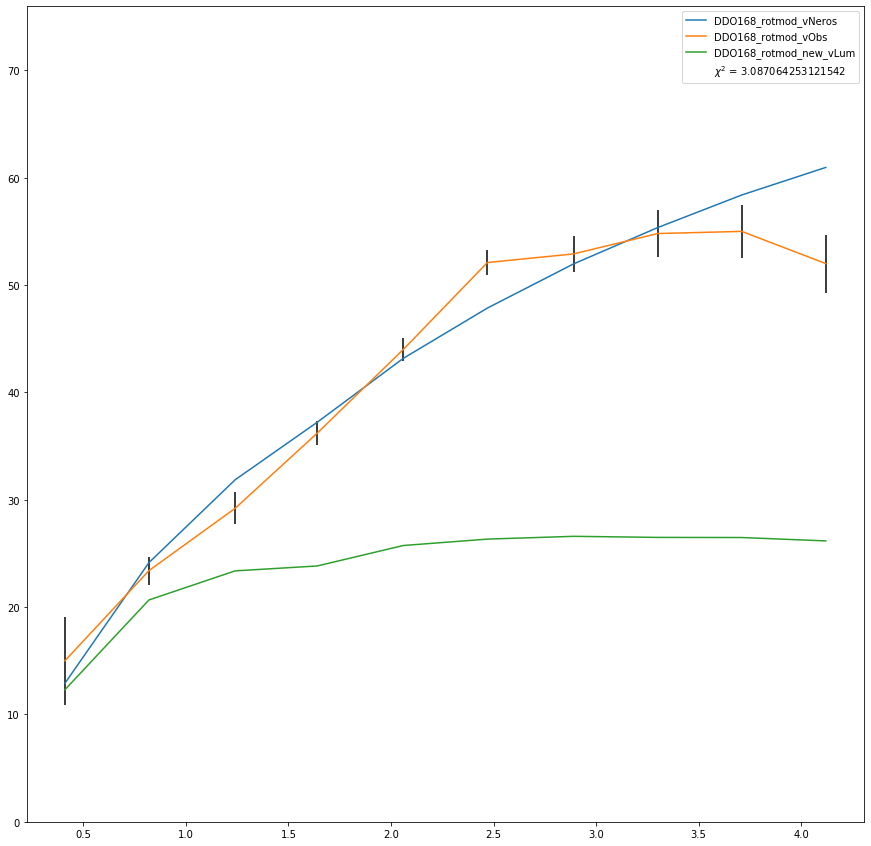

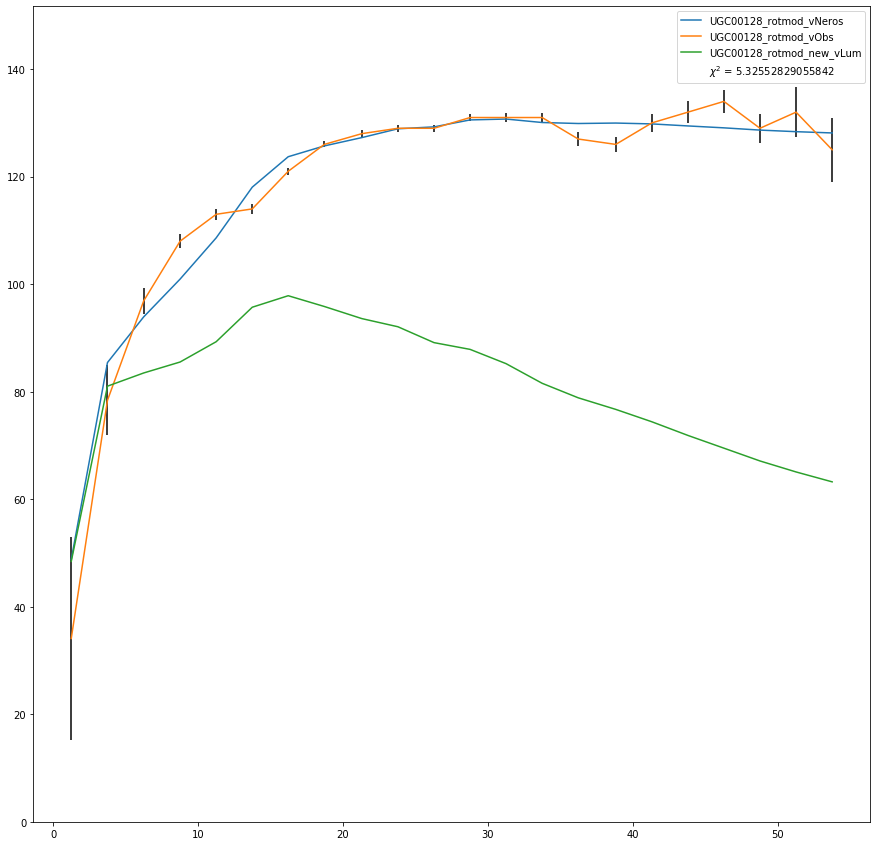

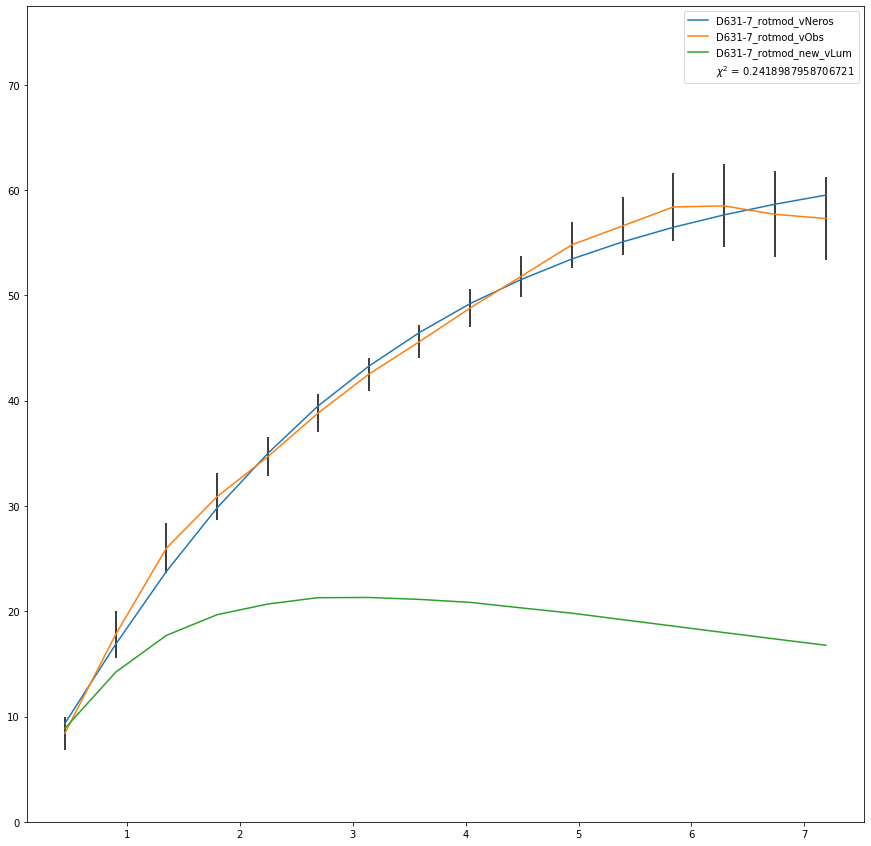

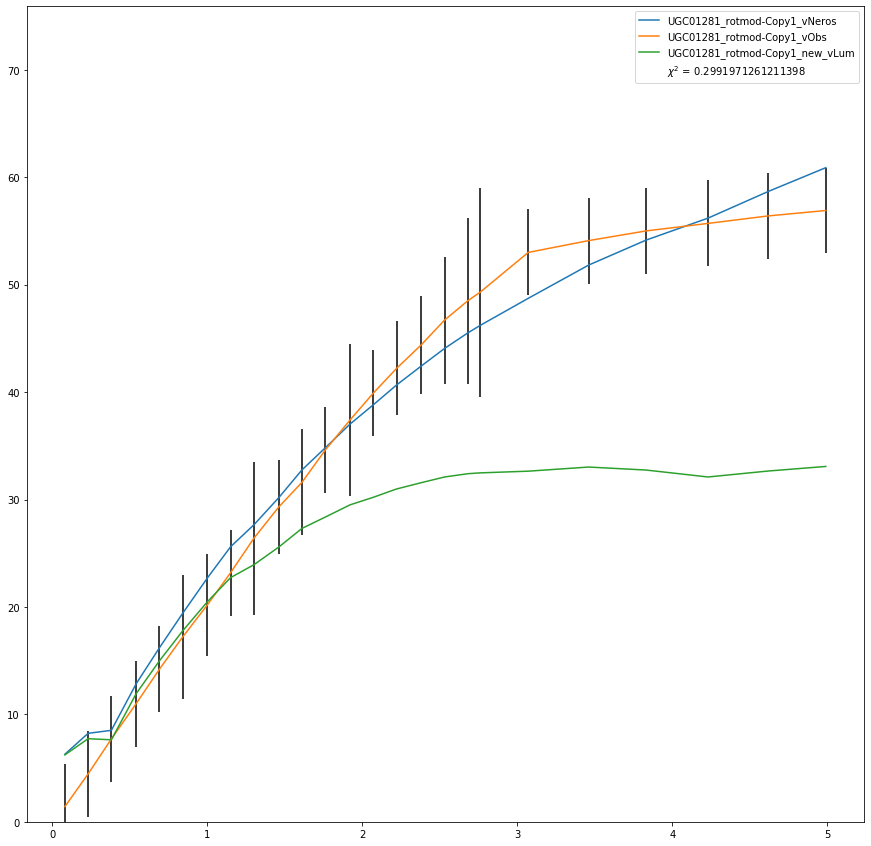

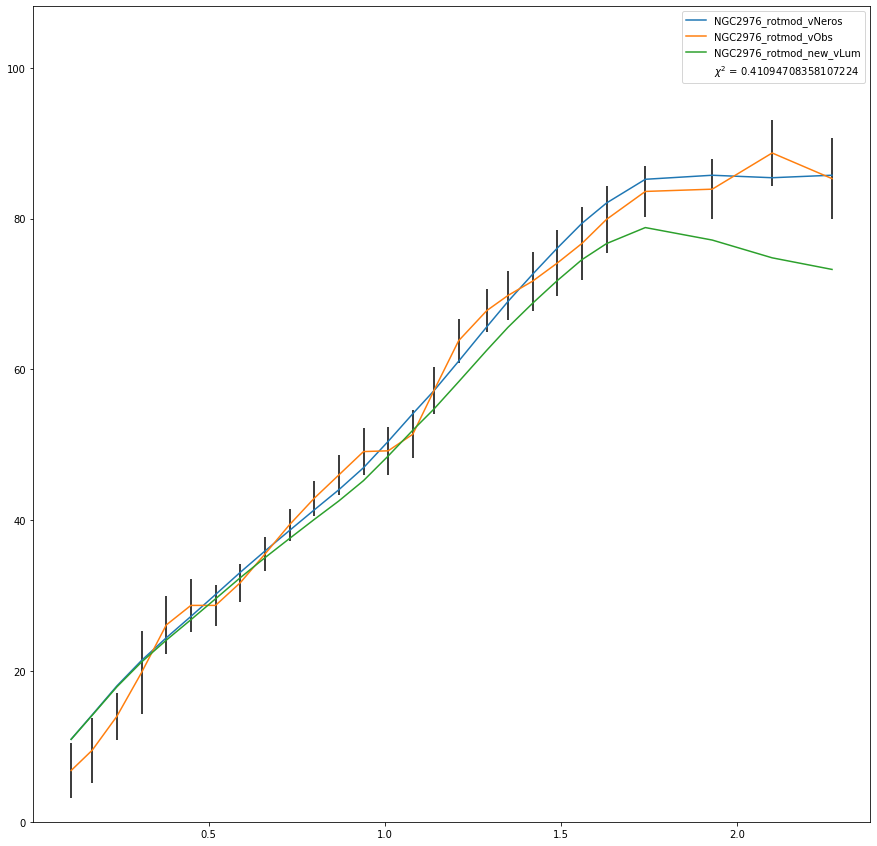

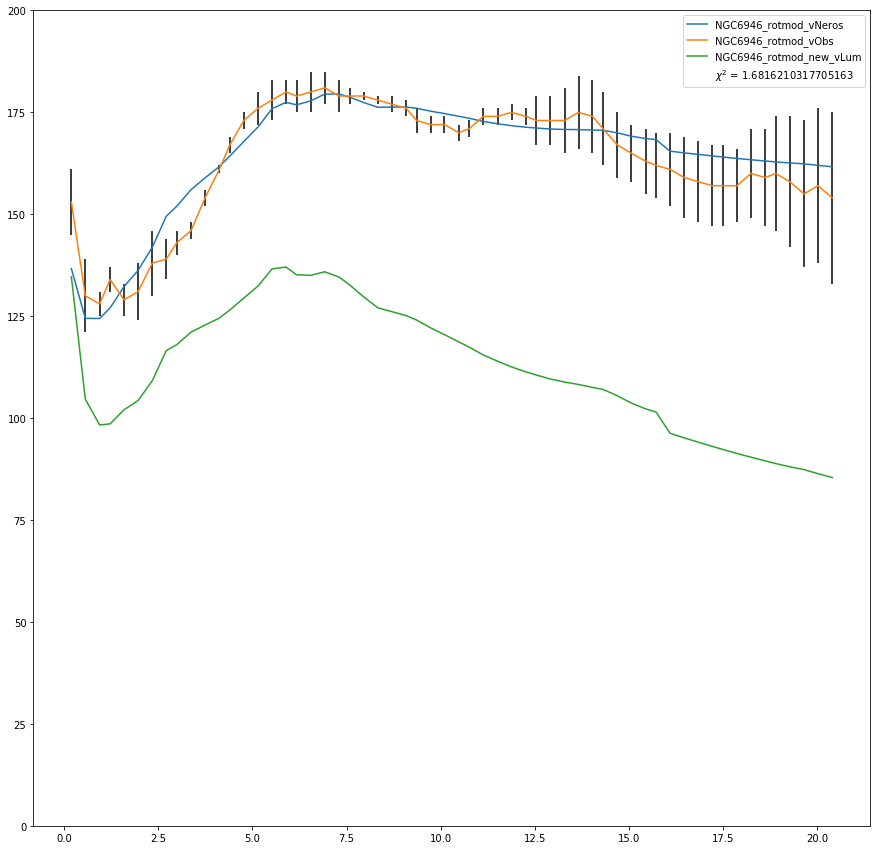

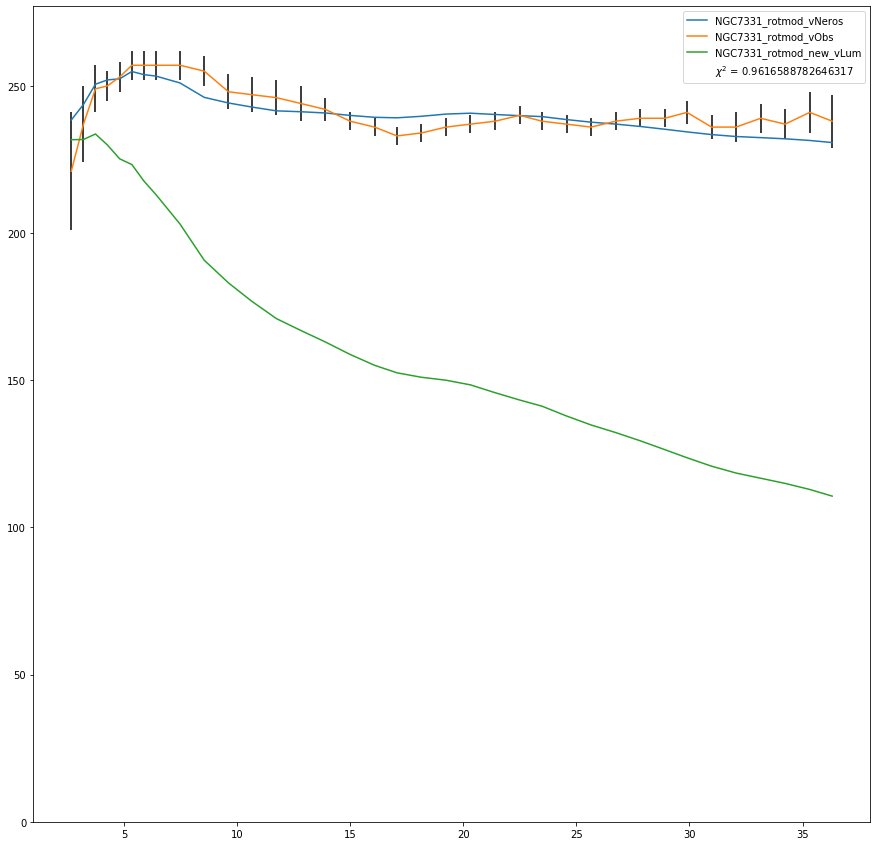

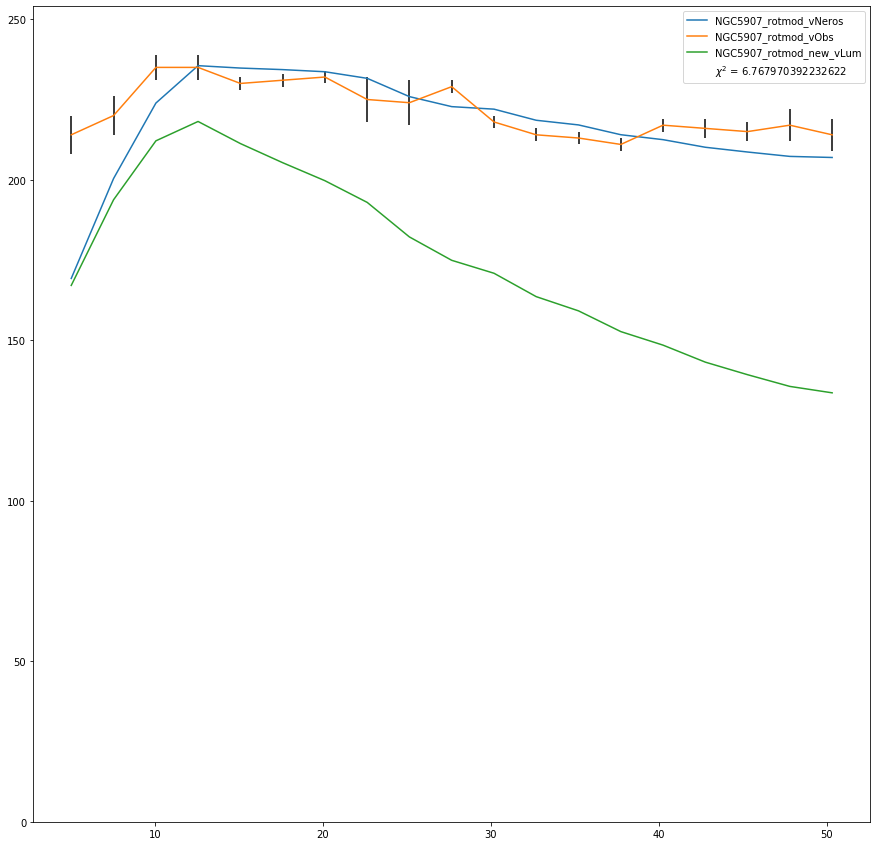

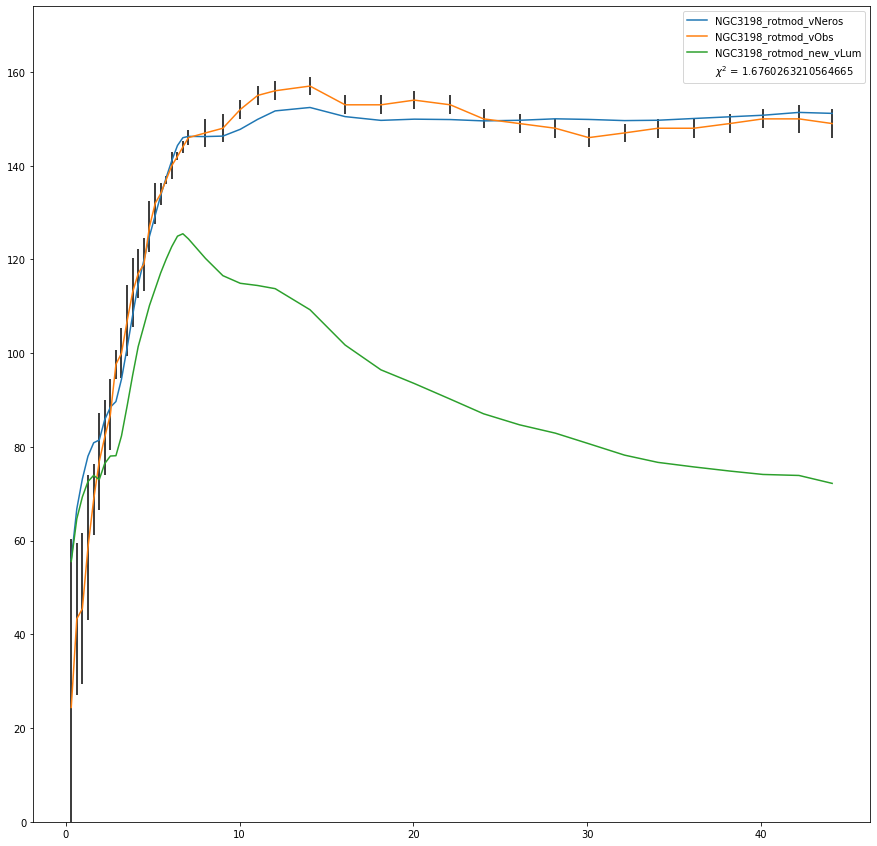

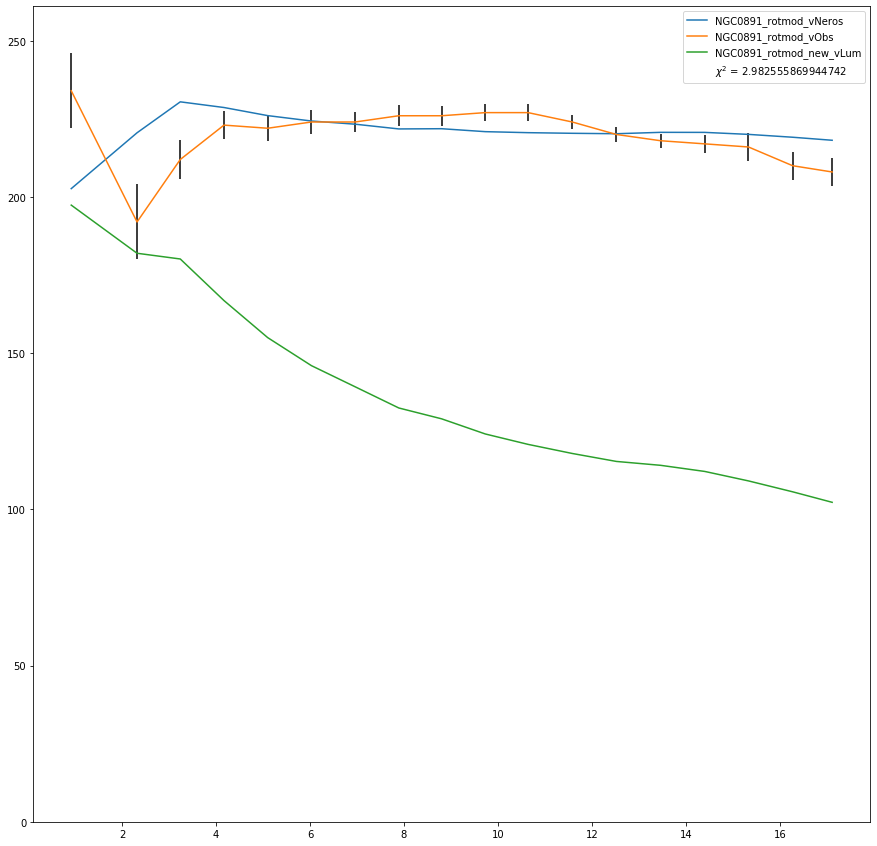

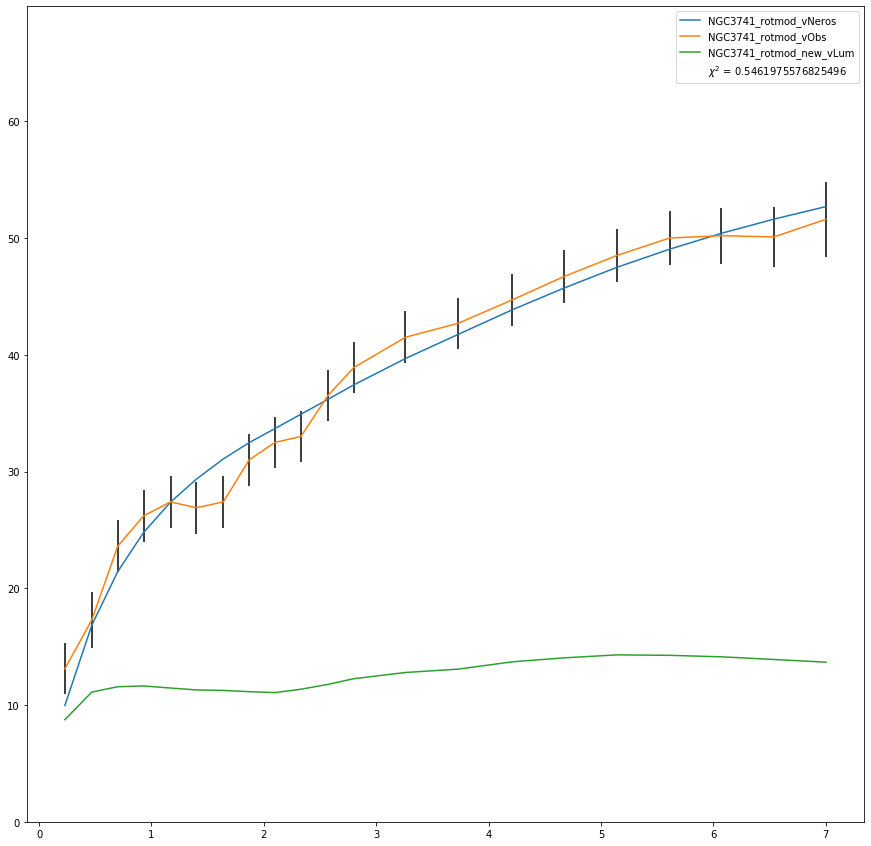

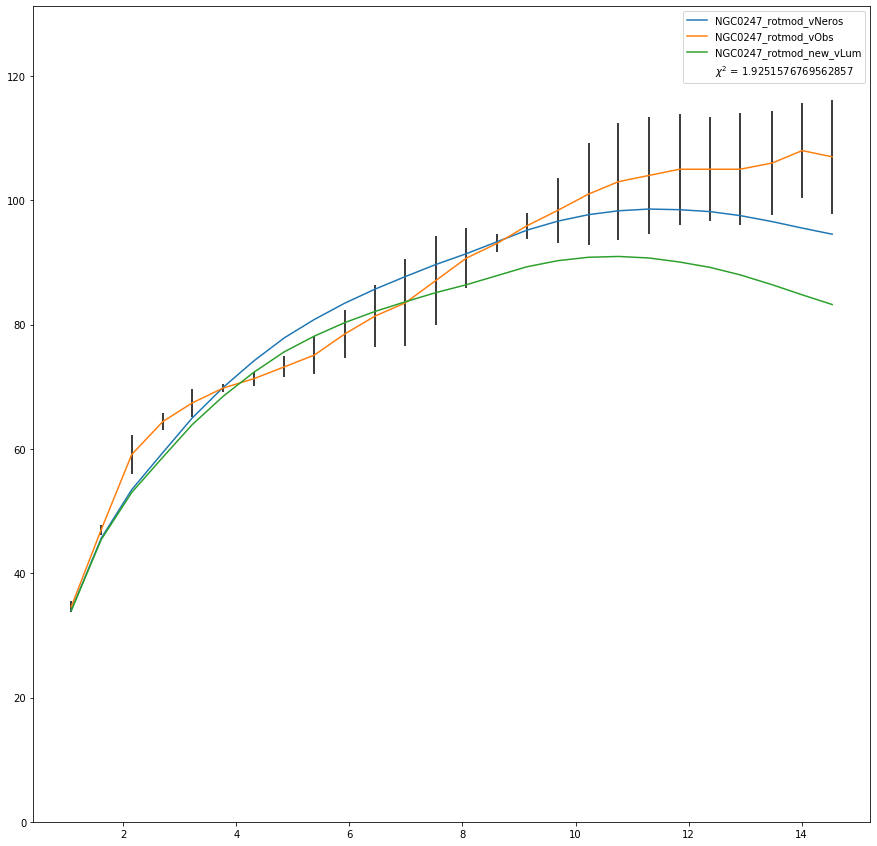

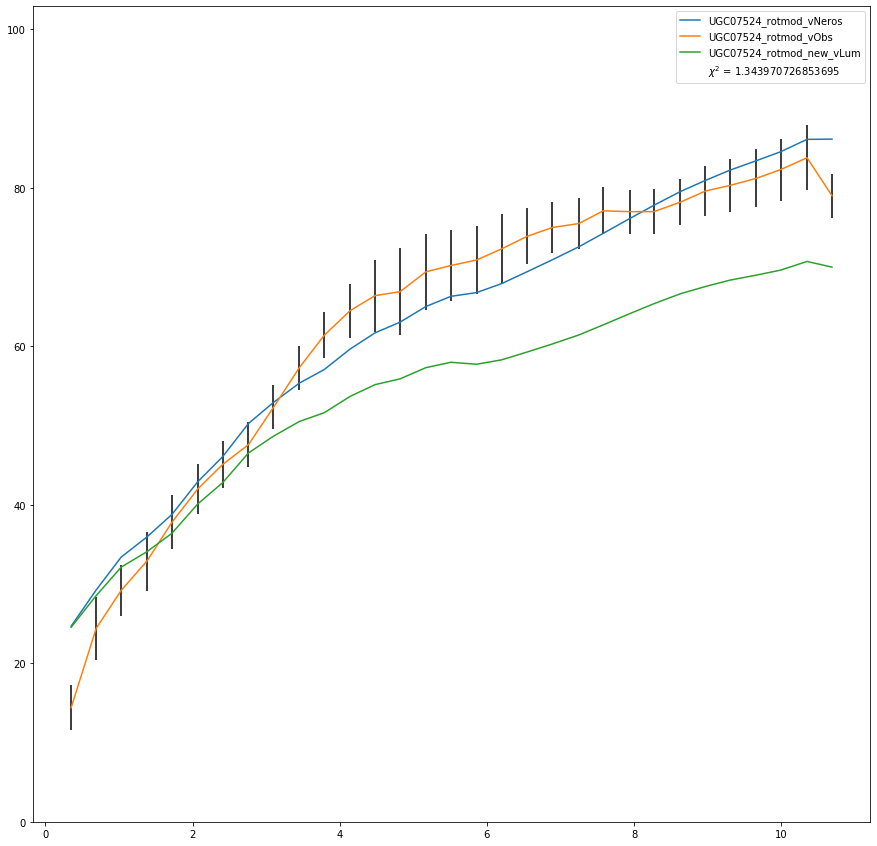

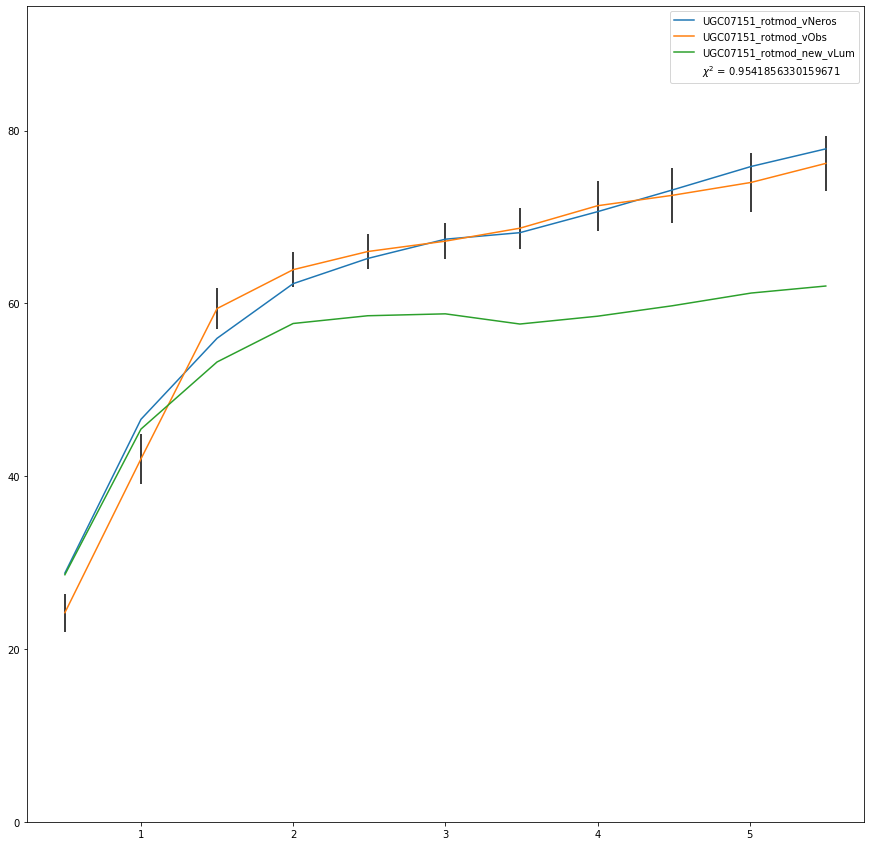

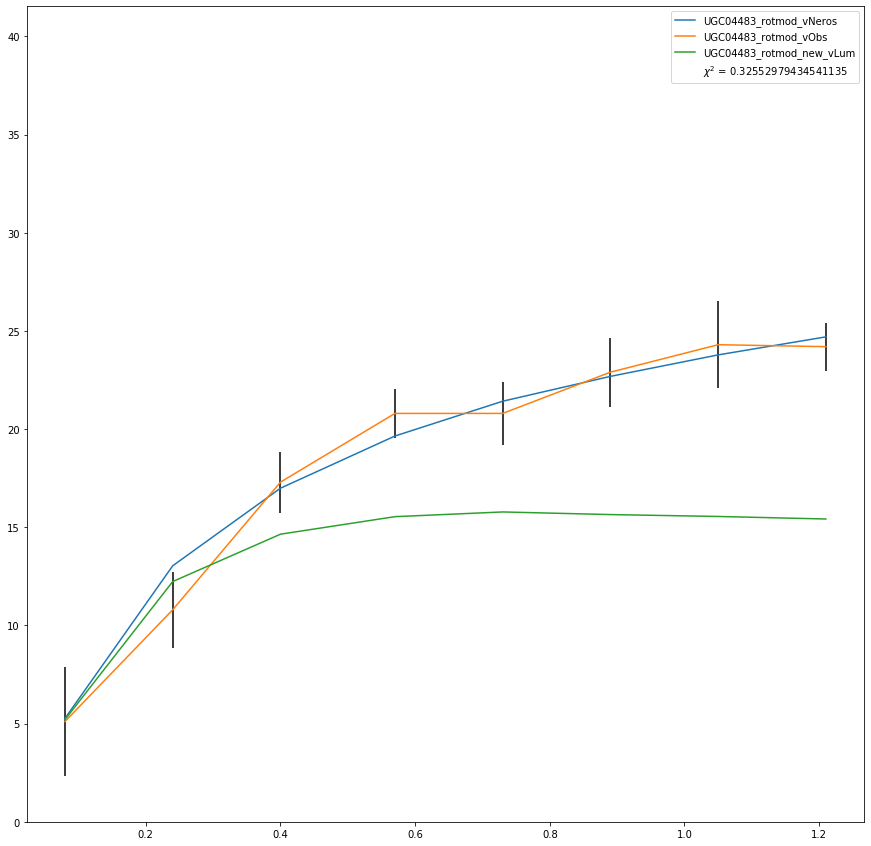

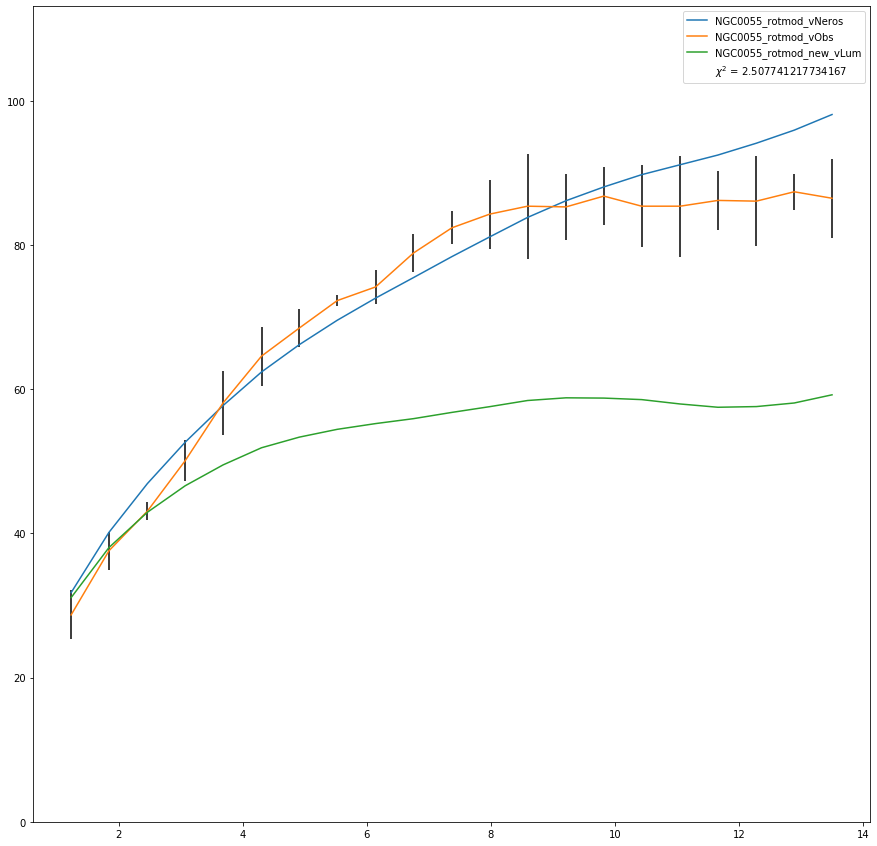

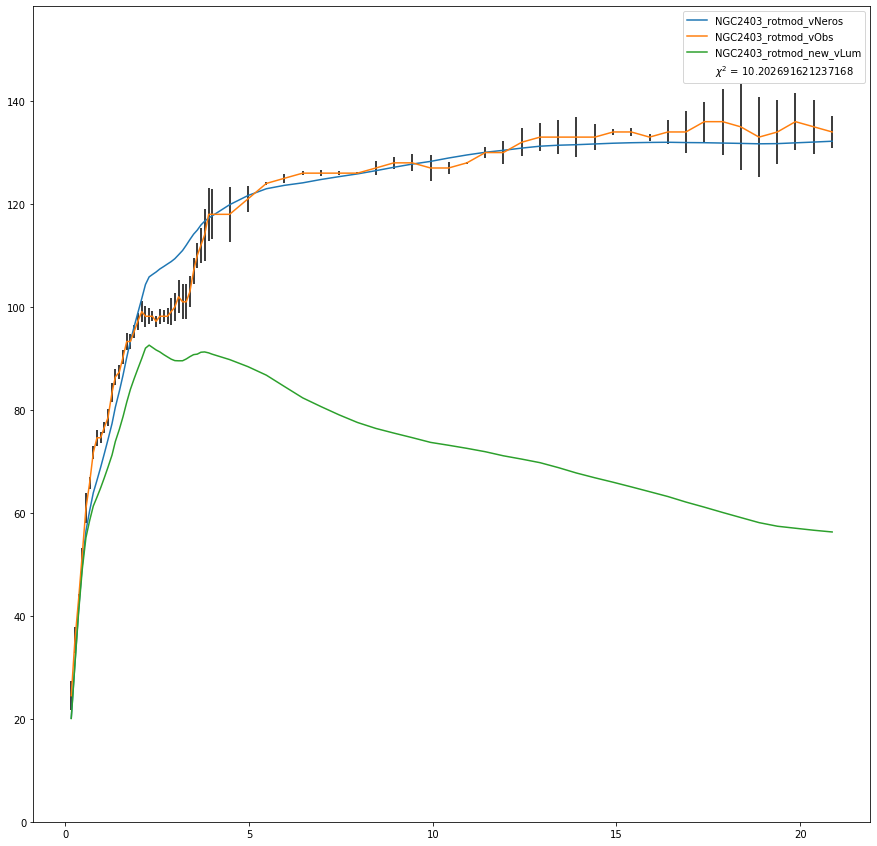

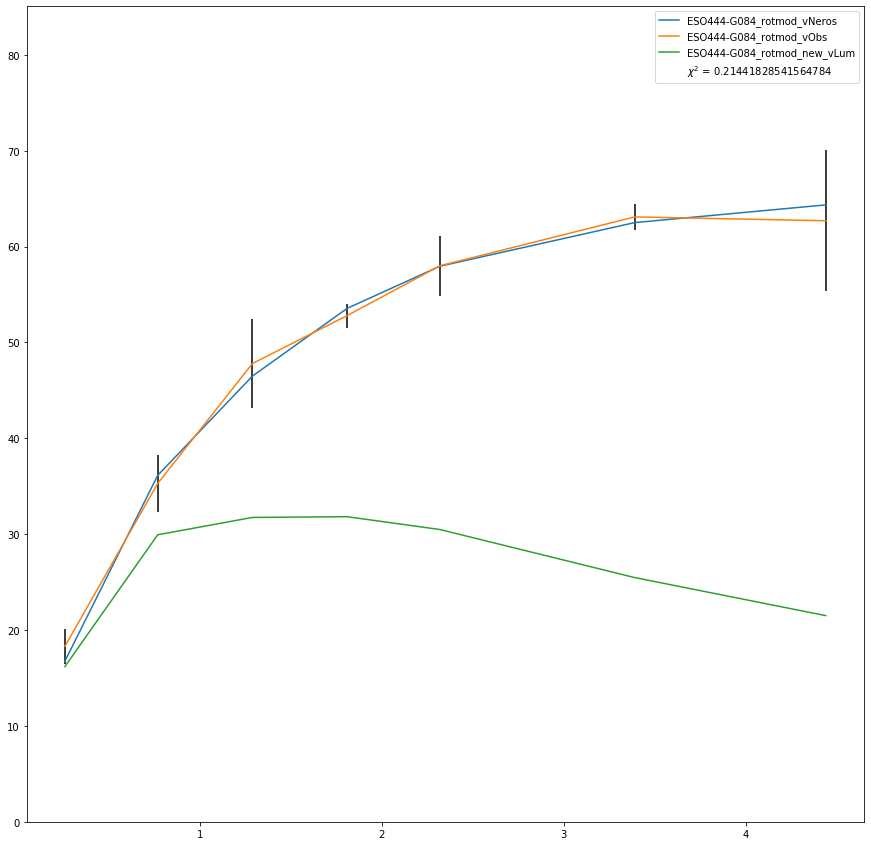

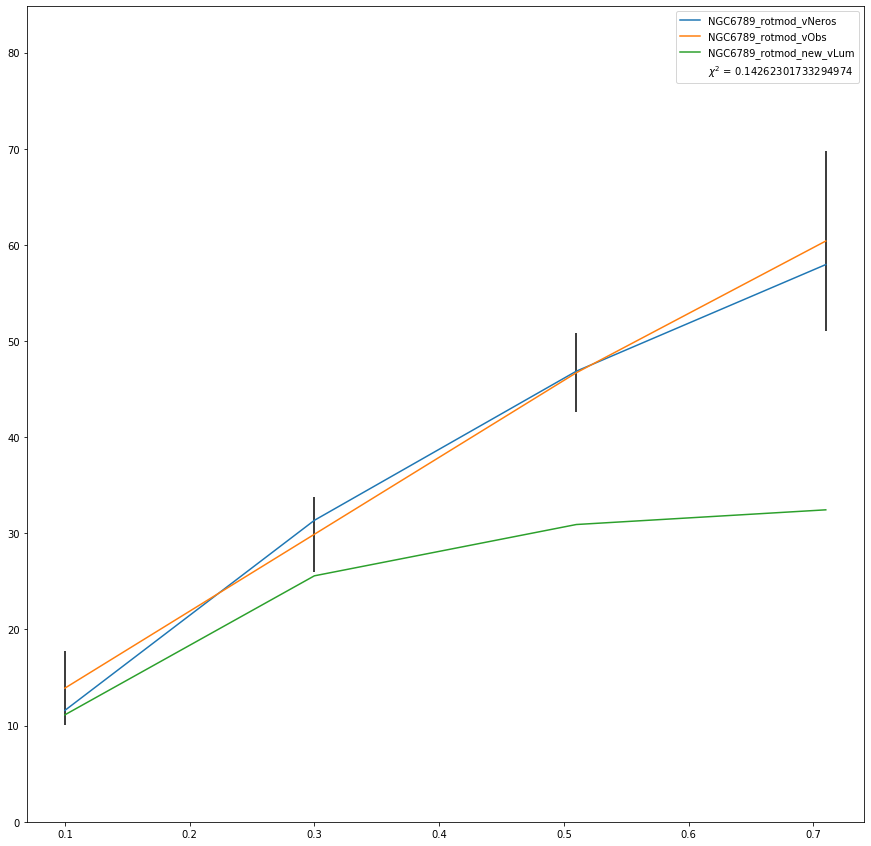

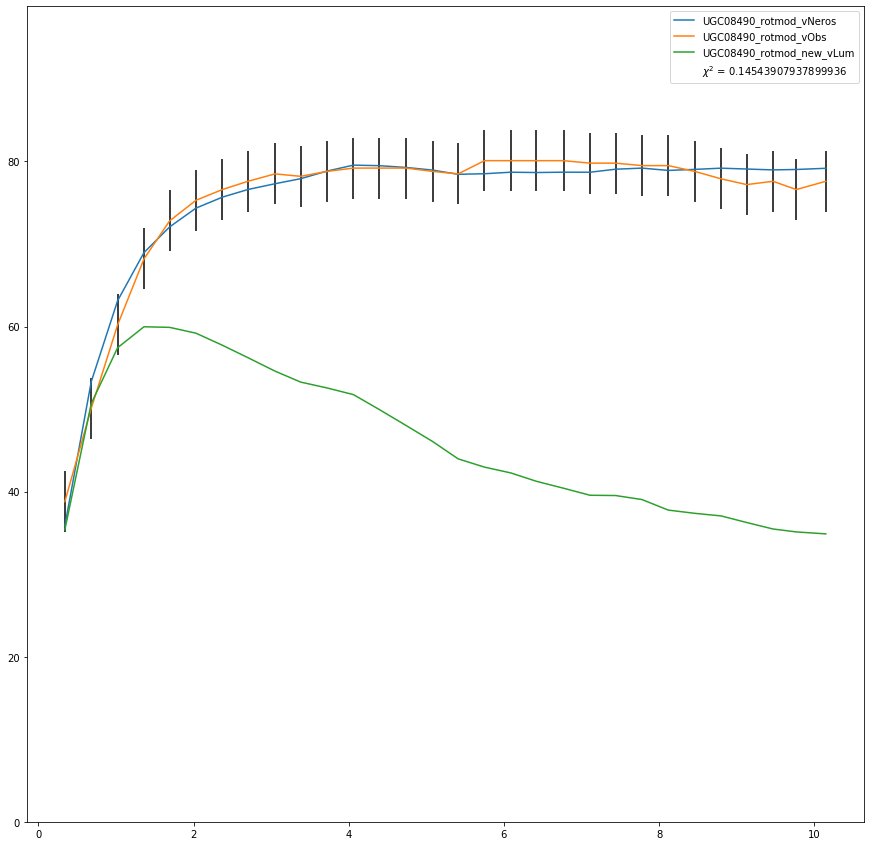

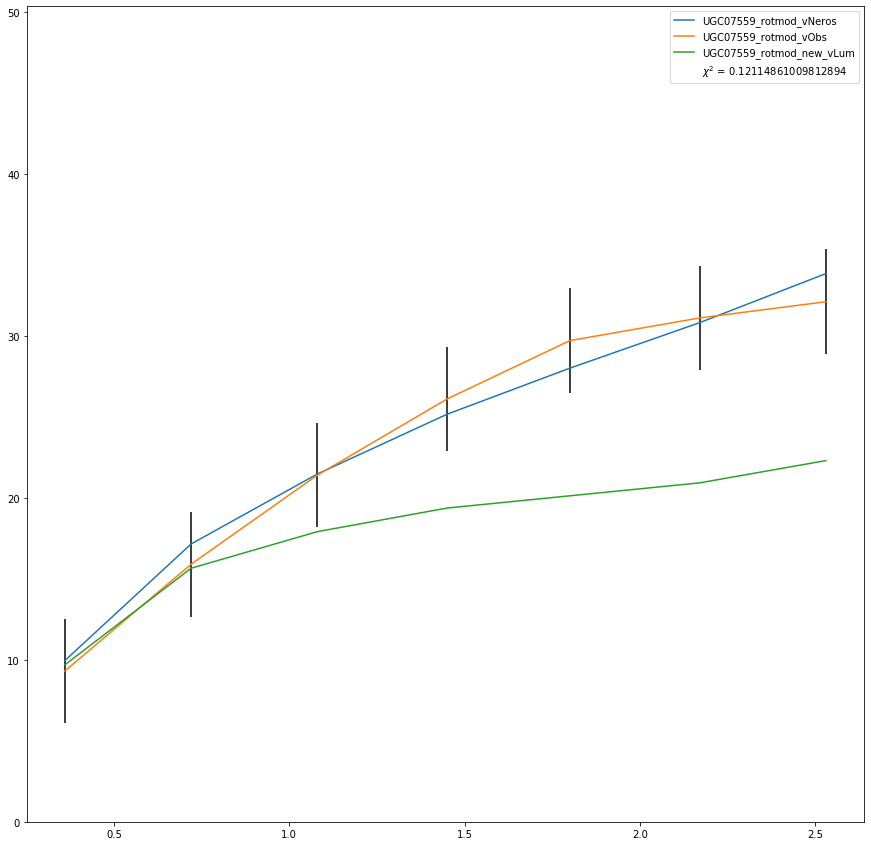

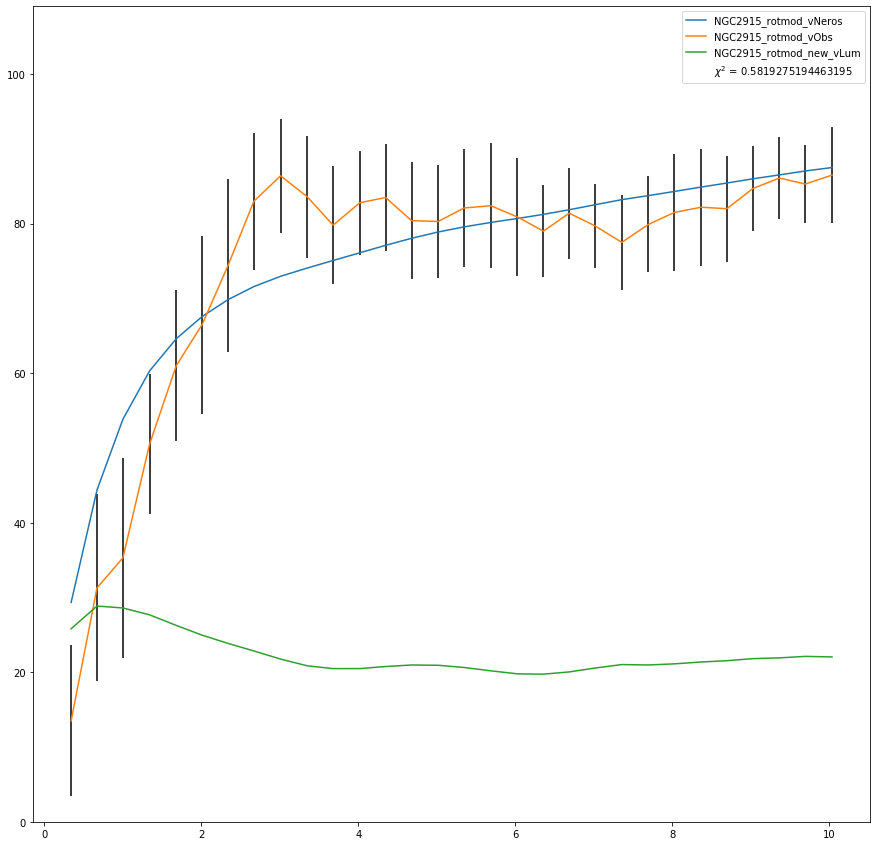

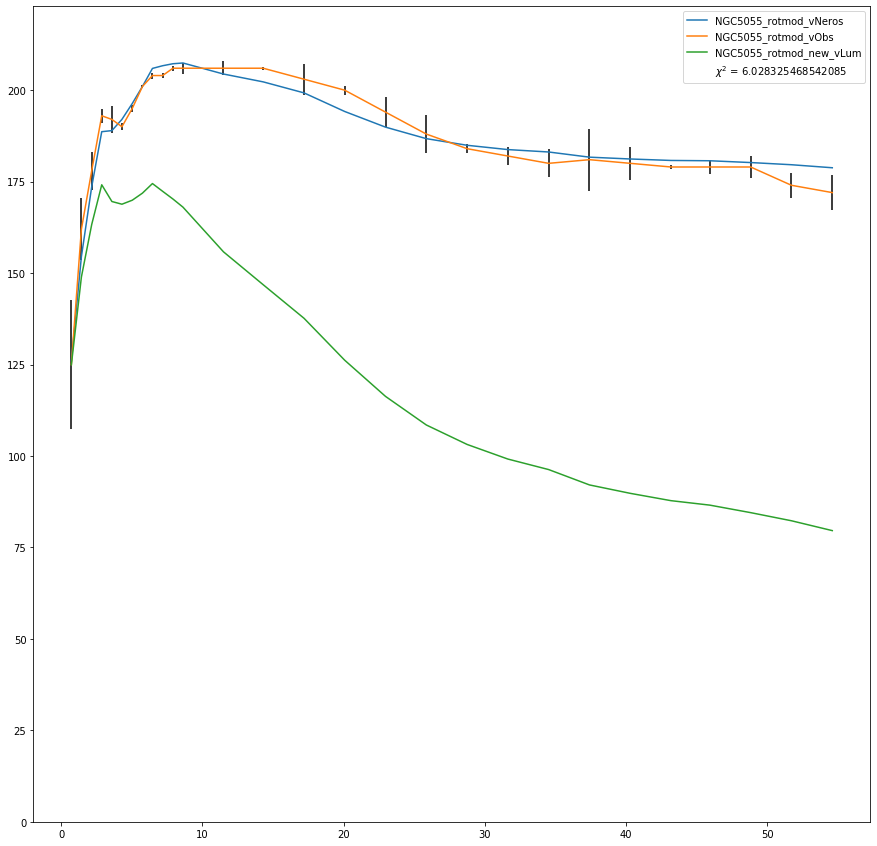

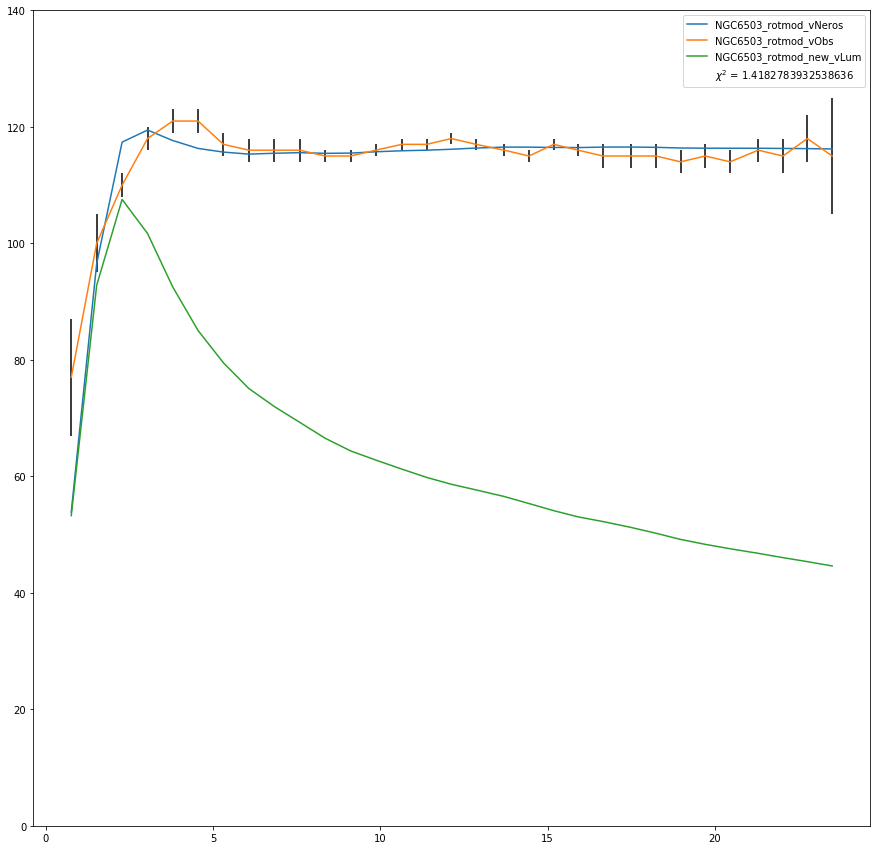

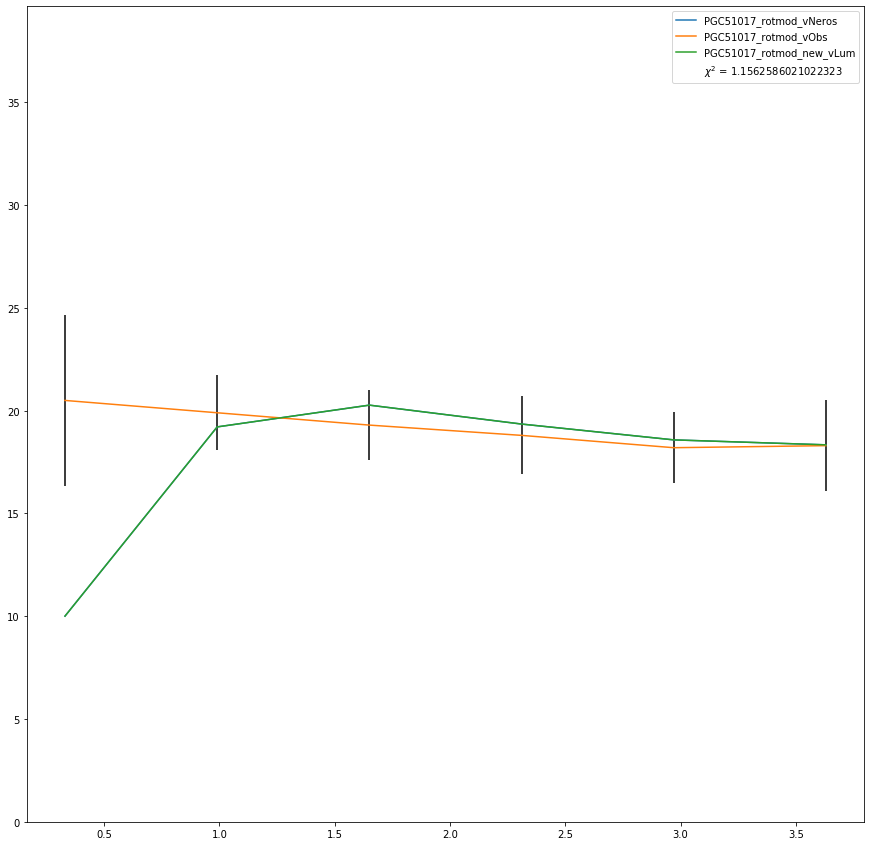

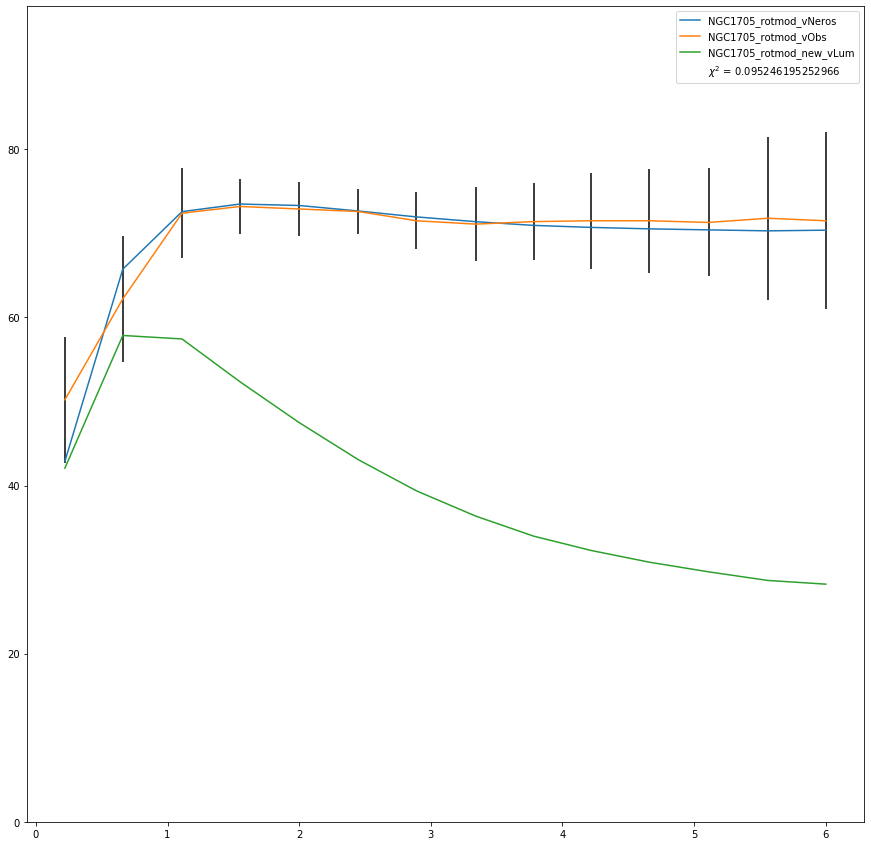

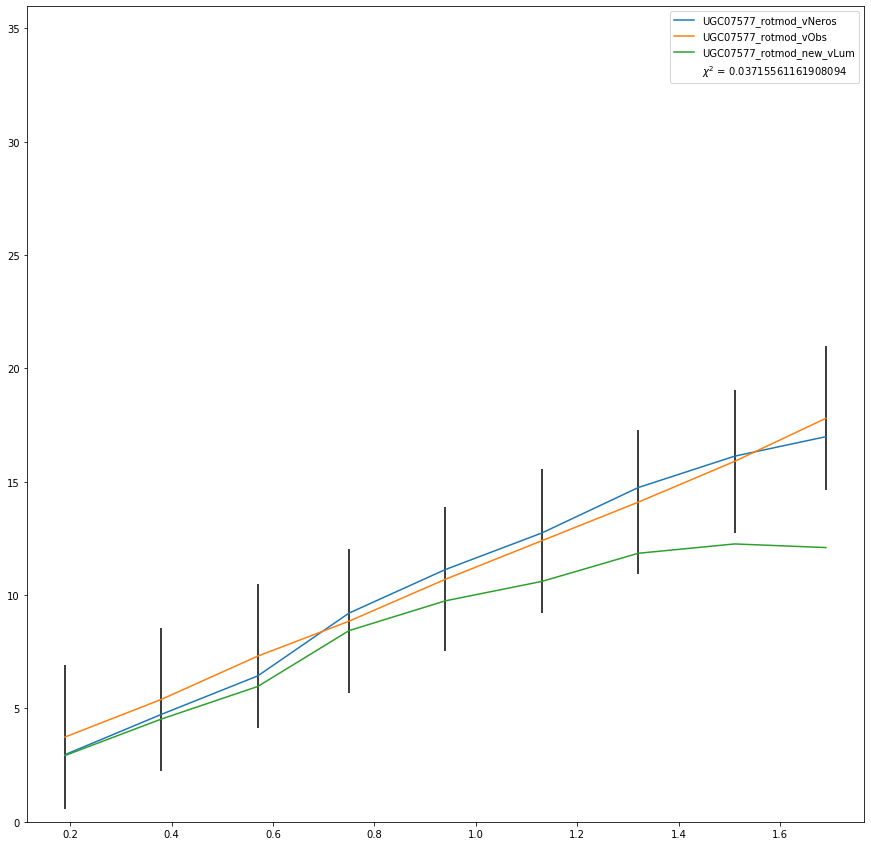

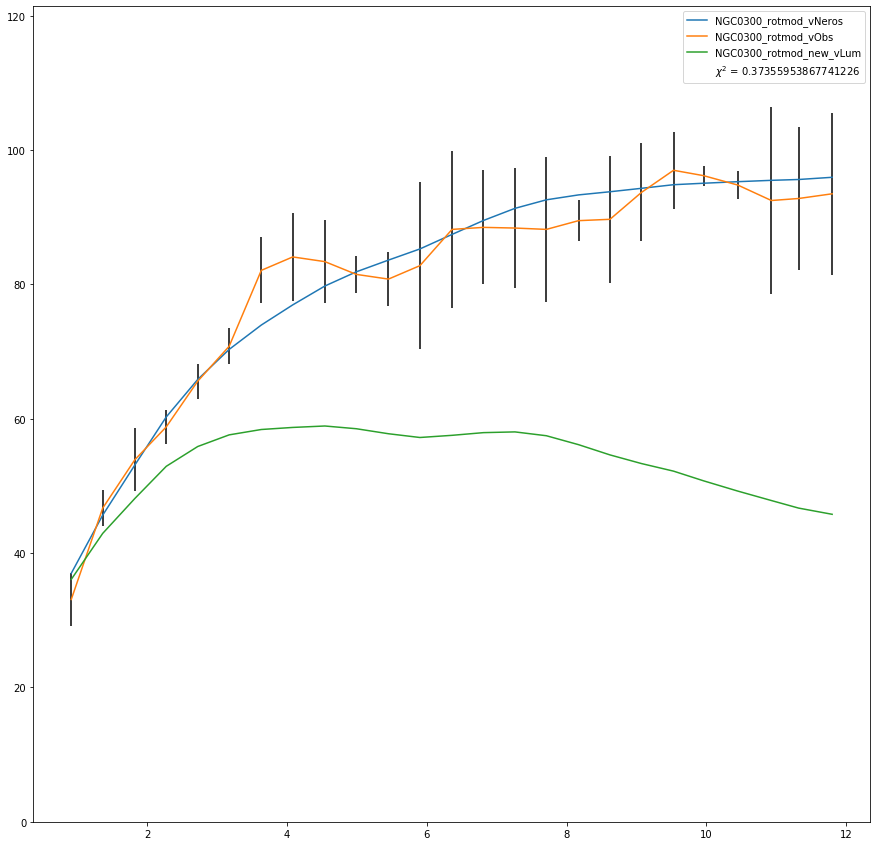

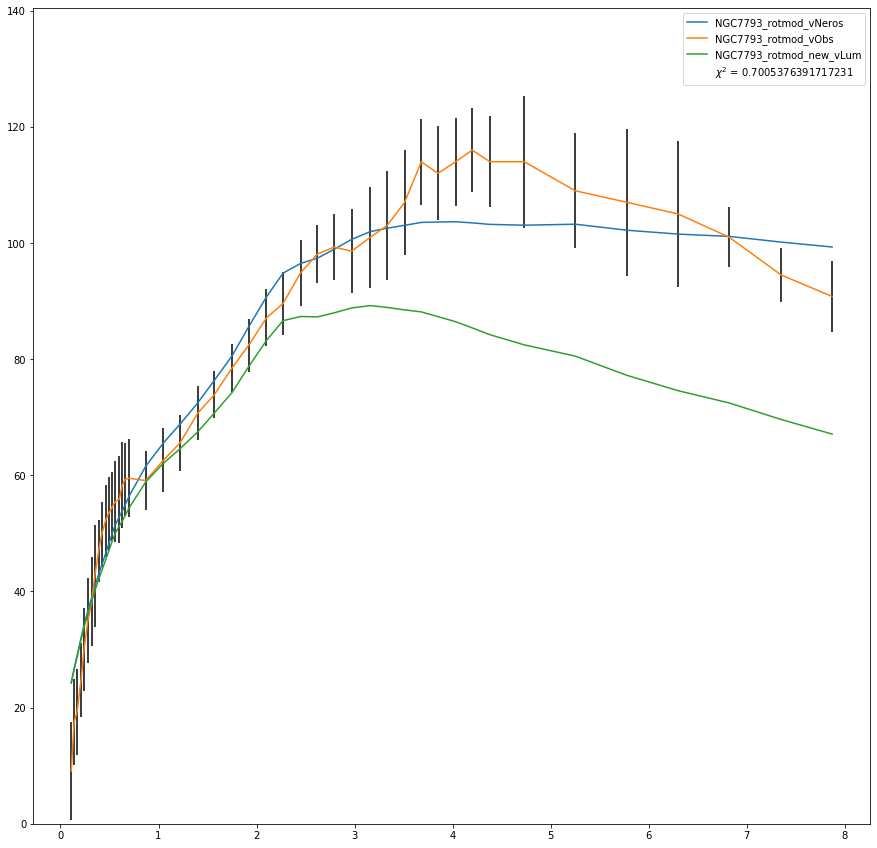

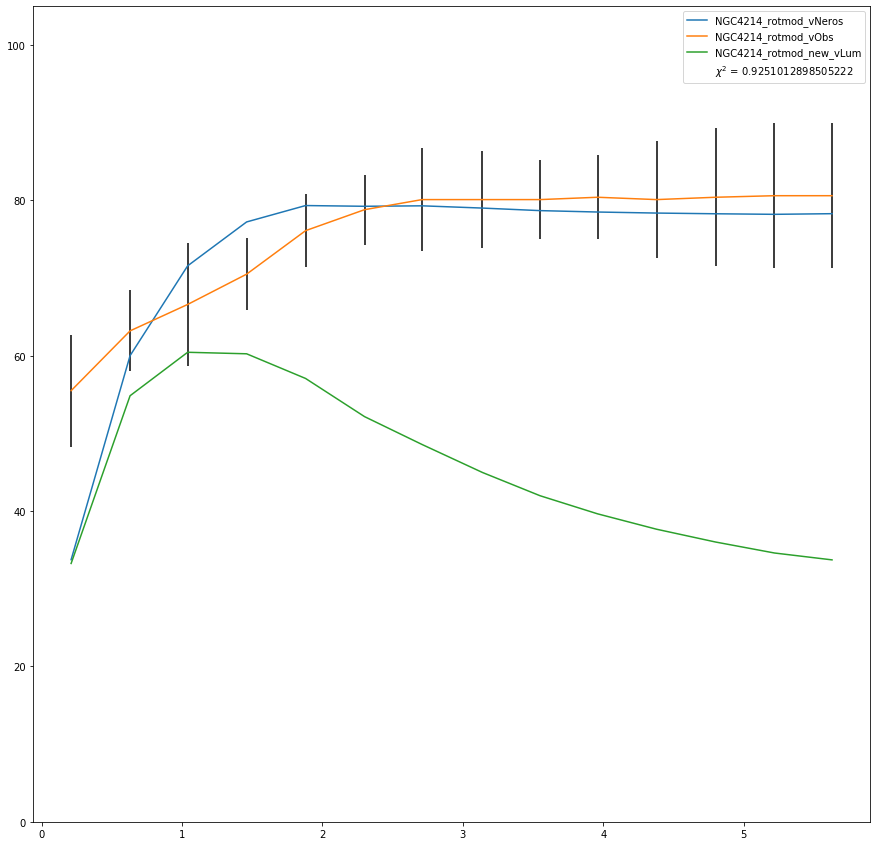

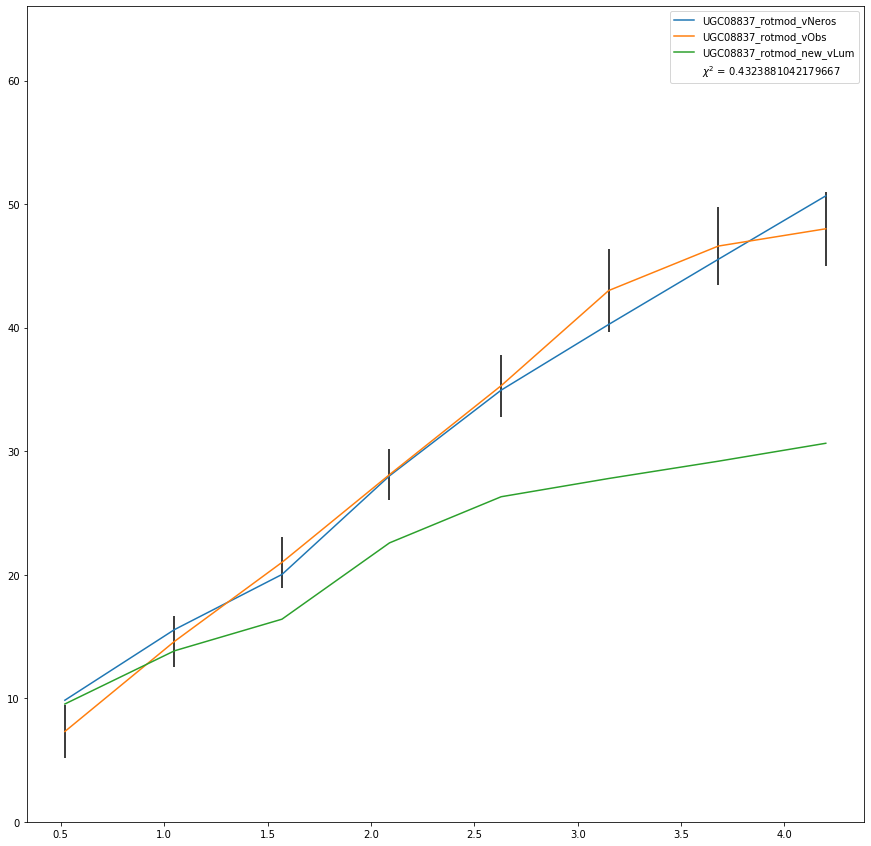

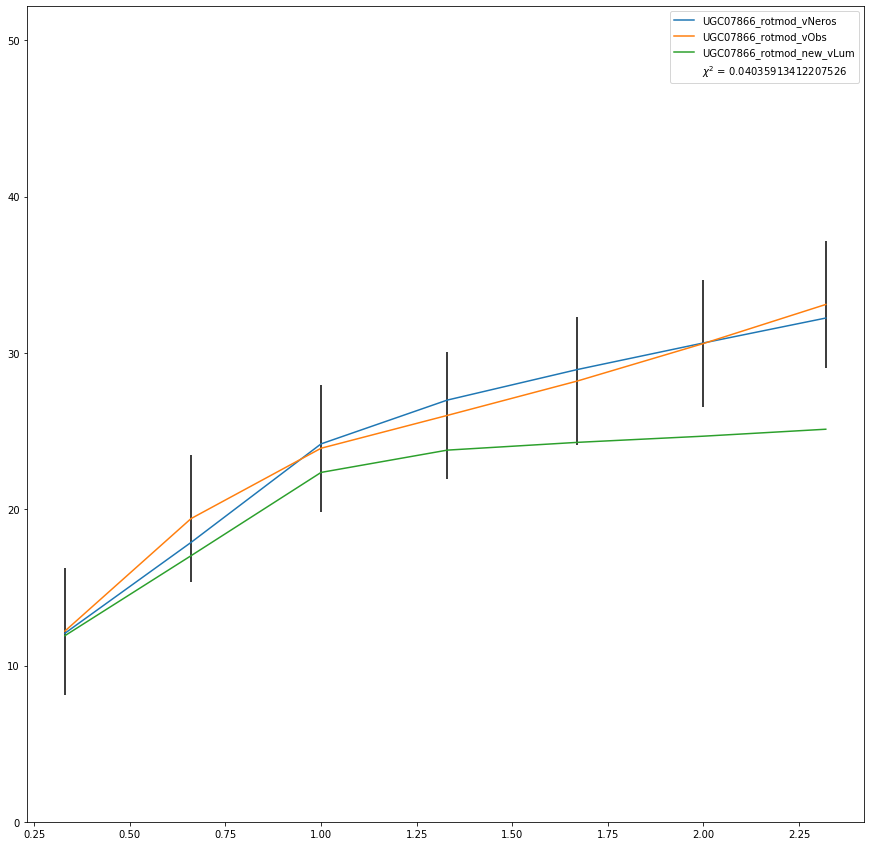

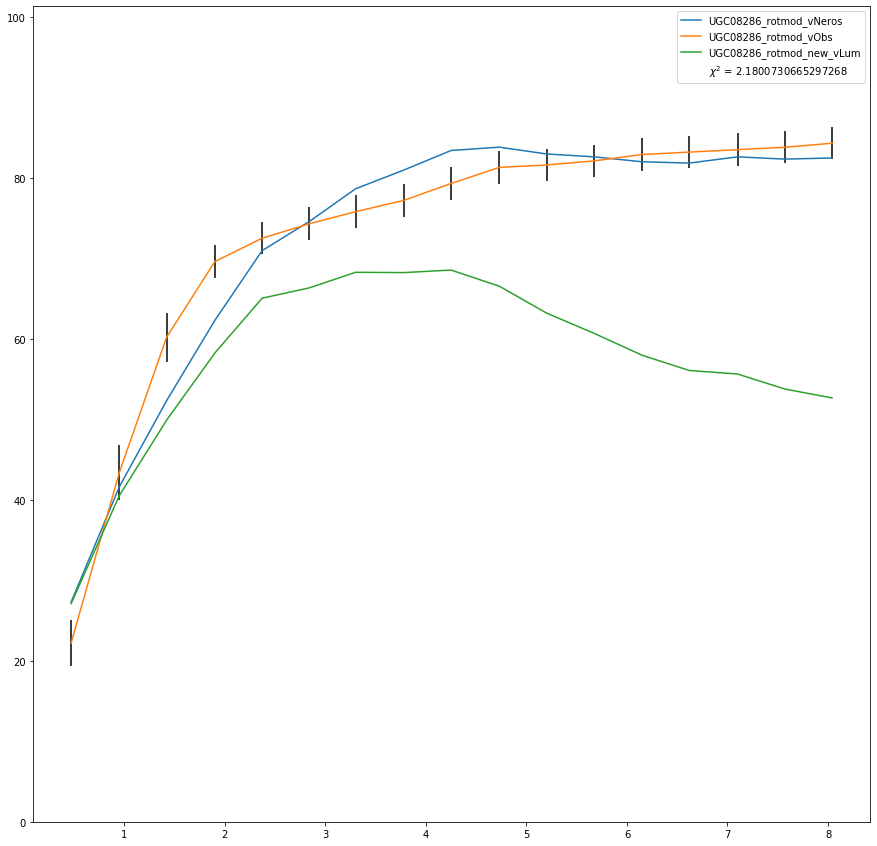

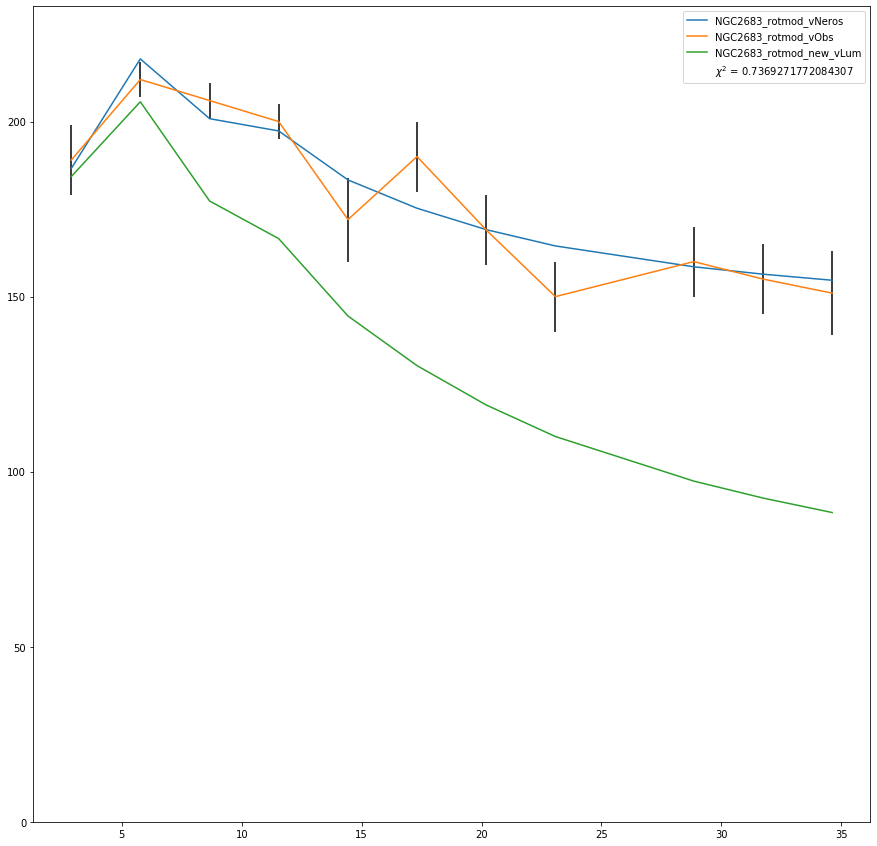

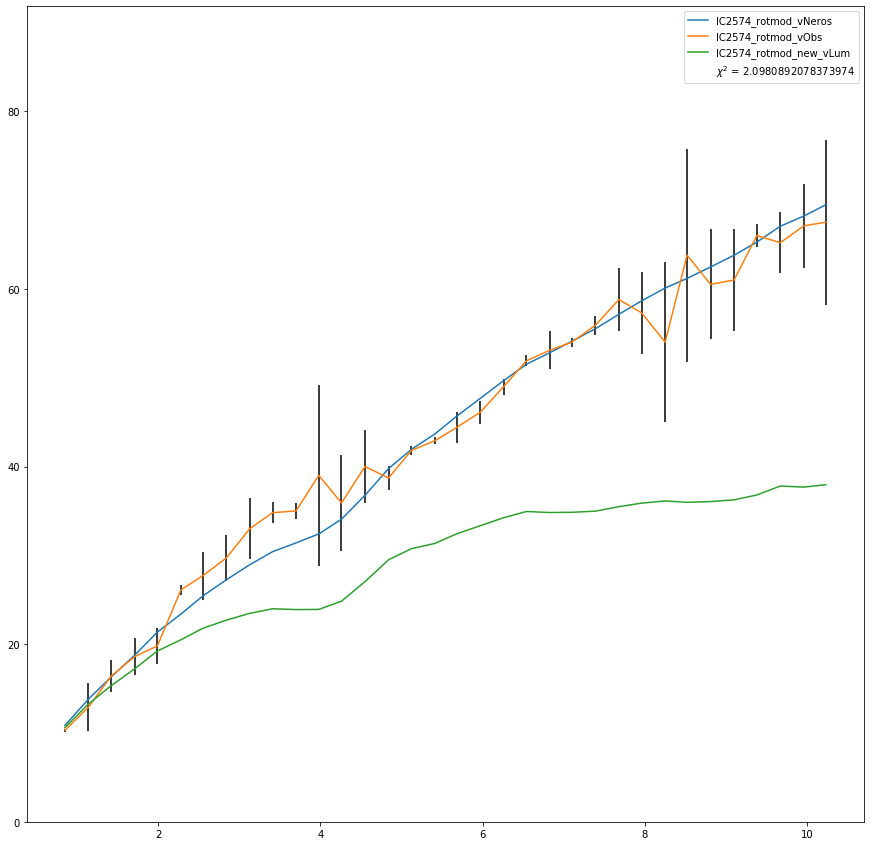

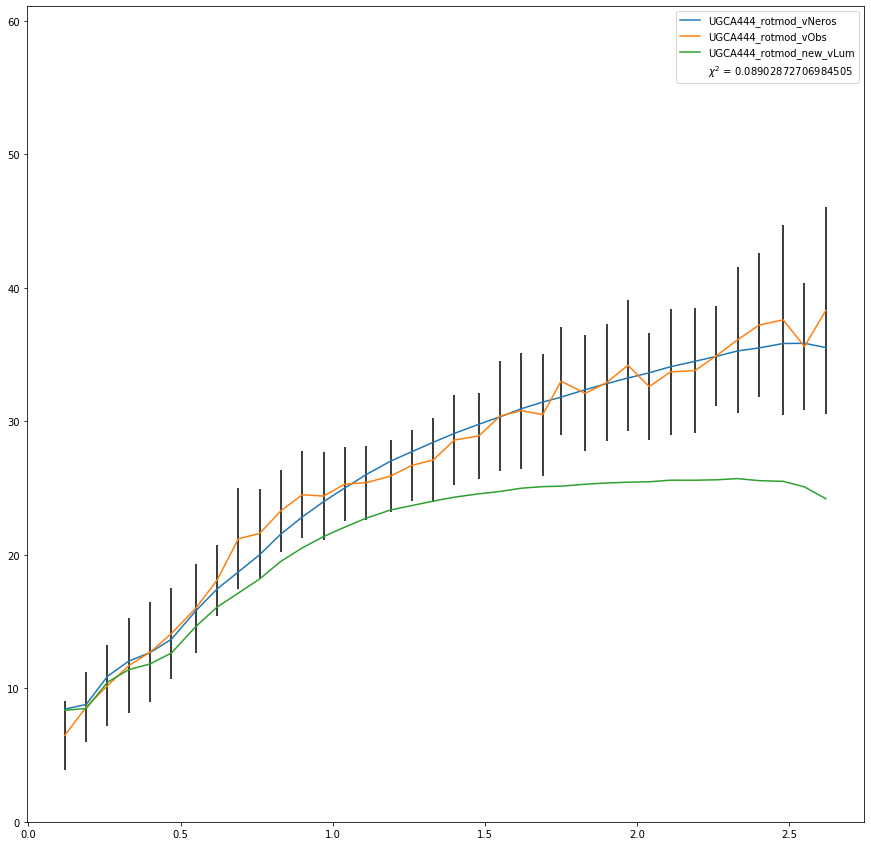

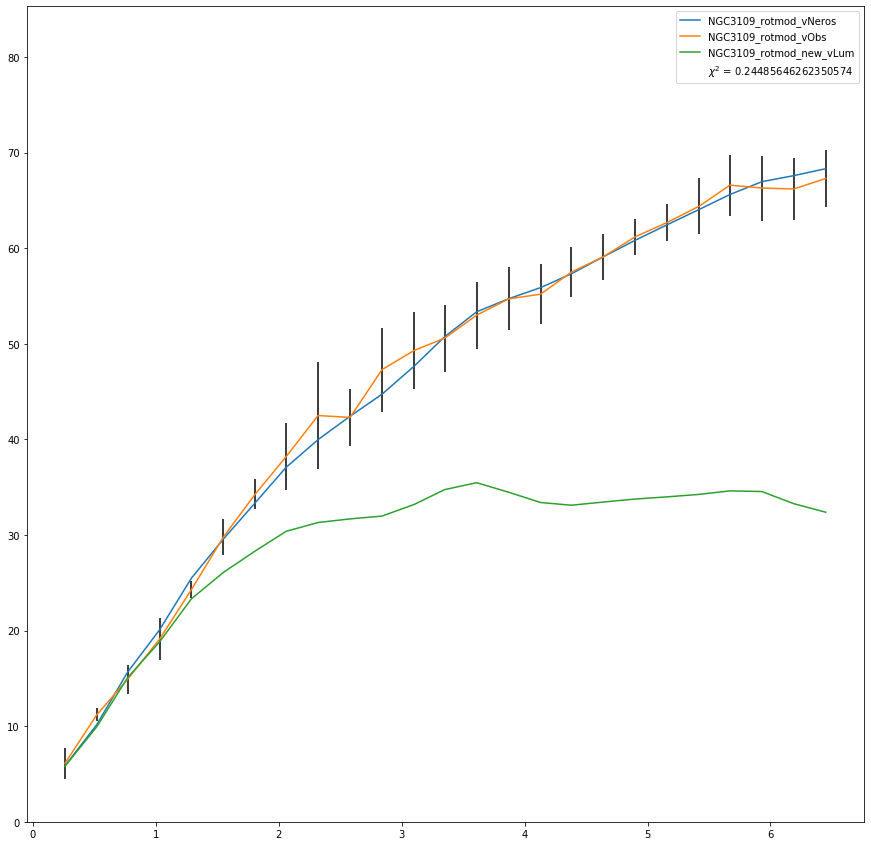

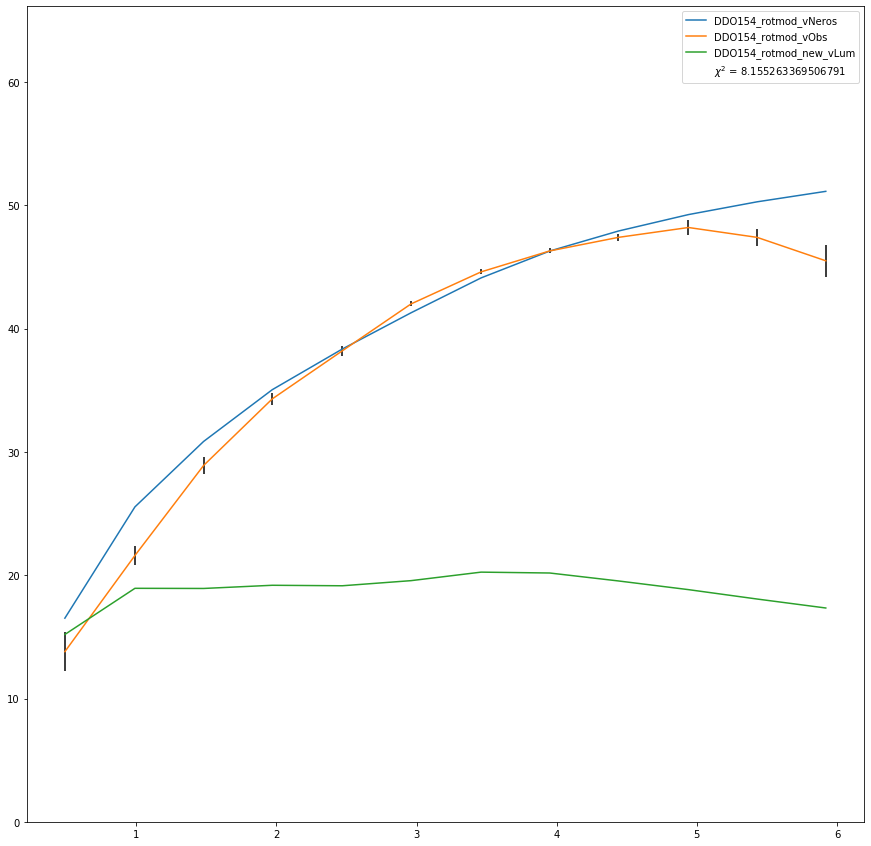

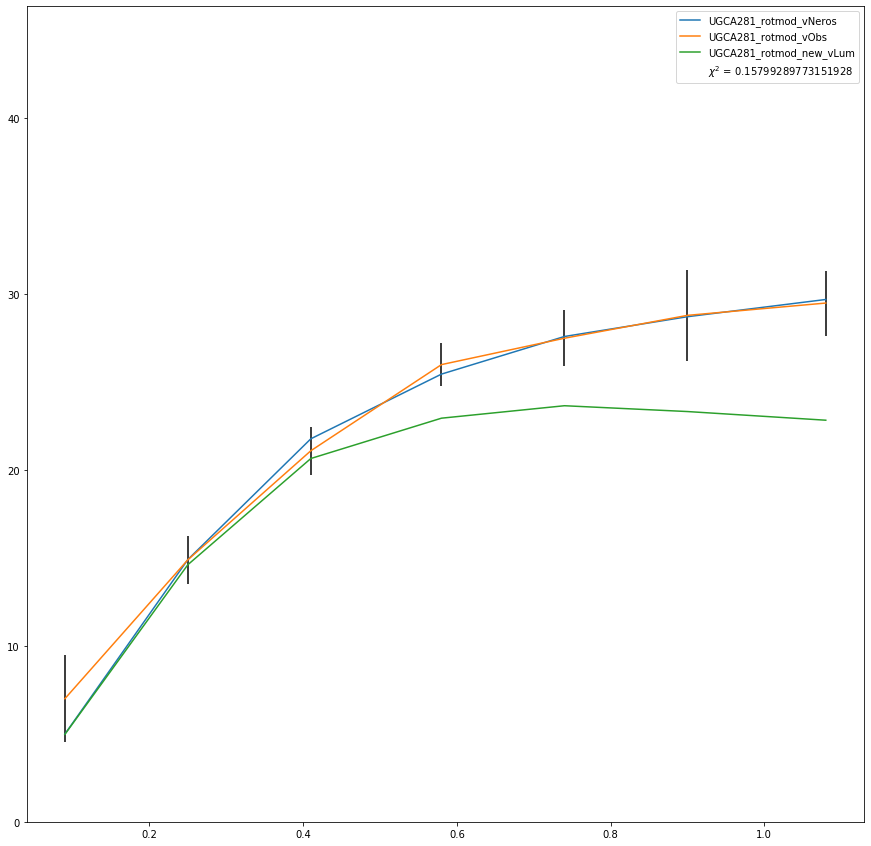

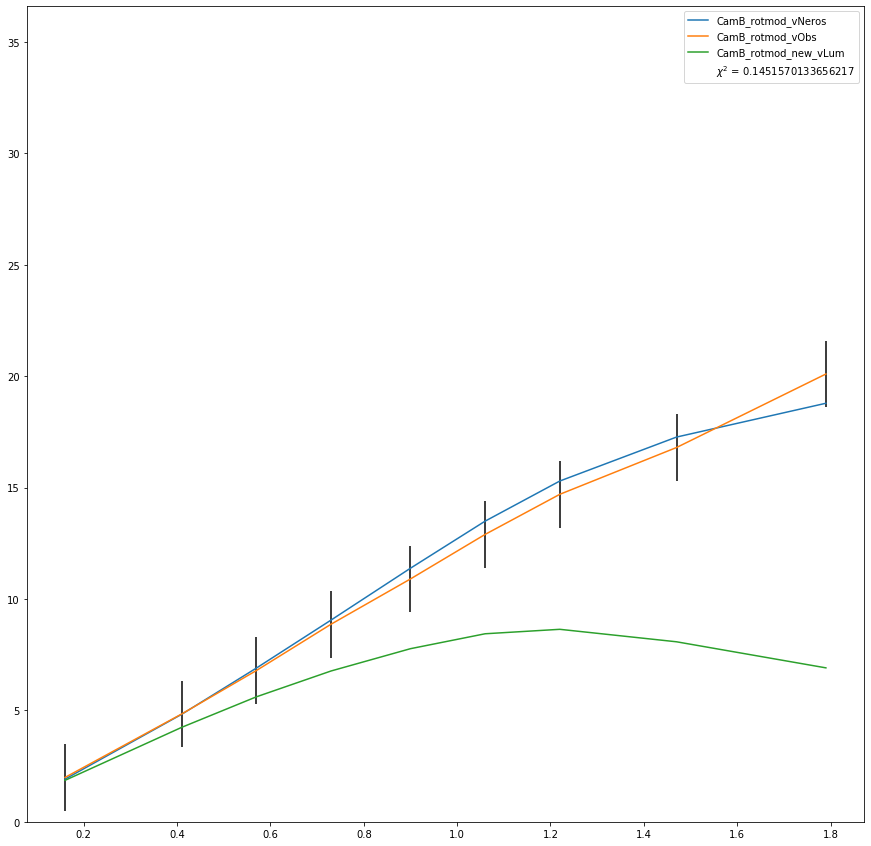

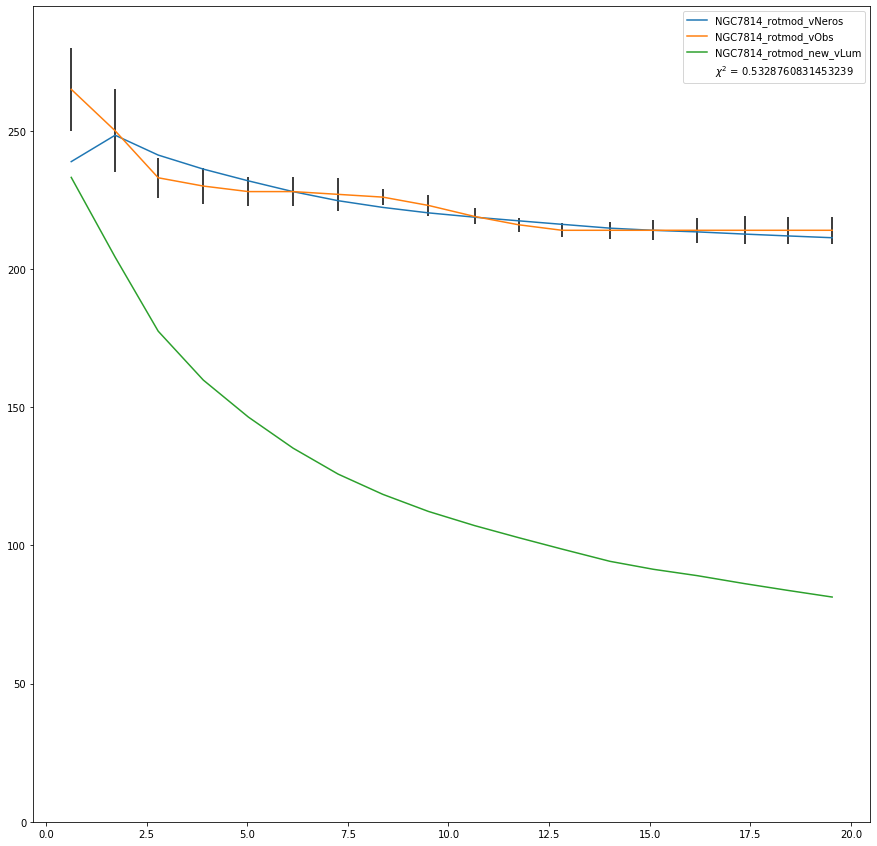

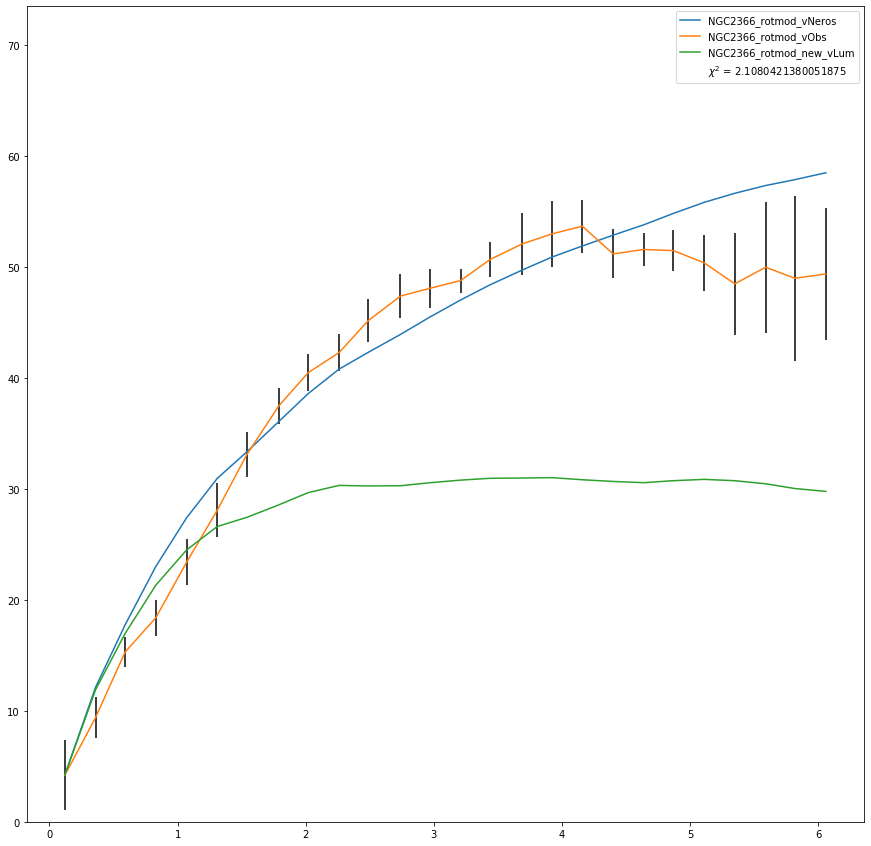

In [5]:
"""
This is the main body of the model. 
It loops through galaxies in the designated sample,
it calculates vLCM, vNeros, and chiSquared,
it fits galaxy data using alpha and vLumFreeParam,
it prints the values of alpha and vLumFreeParam to the console,
and it saves the graphs to a file.
"""

# This is where the fitted alpha & vlum free parameter will be written for each galaxy
out_file = "imported-data/data_" + str(MW_name) + ".csv"
with open(out_file, 'w') as f:
    f.write('{0},{1},{2},{3},{4},{5}\n'.format("Galaxy", "chi_square",  "alpha", "disk_scale", "bulge_scale","phi_zero"))
f.close()

total_chi_squared = []


for galaxyName in galaxies:
    f, ax = plt.subplots(1, figsize = (15, 15))
    
    # Extract out the needed galaxy components
    galaxy = np.array(galaxies[galaxyName])
    galaxy_rad = galaxy[:,0]
    galaxy_vObs = galaxy[:,1]
    galaxy_error = galaxy[:,2]
    galaxy_gas = galaxy[:,3]
    galaxy_disk = galaxy[:,4]
    galaxy_bulge = galaxy[:,5]

    # Just fit then extract the relevant pieces
    try:
        neros_fns.fit(galaxy_rad, galaxy_gas, galaxy_disk, galaxy_bulge, galaxy_vObs, galaxy_error)

        print(f"galaxyName is: {galaxyName}")
        fit_results = neros_fns.get_fit_results(galaxy_rad)
        for param in fit_results:
            print(f"{param} is: {fit_results[param]}")
        print("--------------------------")

        total_chi_squared.append(fit_results['chi_squared'])

        print("Running average chi_squared: {}".format(sum(total_chi_squared)/len(total_chi_squared)))


        # Write galaxyName, fitted parameters
        with open(out_file, 'a') as f:
            f.write(f"{galaxyName},{fit_results['chi_squared']},{fit_results['alpha']}, \
                    {fit_results['disk_scale']},{fit_results['bulge_scale']},{fit_results['phi_zero']} \n")
        f.close()

        trimmed_rad = neros_fns.get_rad()
        trimmed_vLum_updated = neros_fns.get_vLum_scaled()
        trimmed_vObs = neros_fns.get_vObs()
        trimmed_error = neros_fns.get_vObsError()
        vNeros = neros_fns.get_vNeros()

        # plot
        # y-axis scales to the maximum velocity value in the list galaxy_vObs_err_incl
        # or to the maximum value in the list vNeros, whichever is the bigger number
        y_max = max(max(trimmed_vObs + trimmed_error), max(vNeros))
        ax.set_ylim(bottom = 0, top = y_max + 15)

        # plot vObs and vNeros and updated vLum
        ax.plot(trimmed_rad, vNeros, label="{}_vNeros".format(galaxyName))
        ax.plot(trimmed_rad, trimmed_vObs, label="{}_vObs".format(galaxyName))
        ax.plot(trimmed_rad, trimmed_vLum_updated, label="{}_new_vLum".format(galaxyName))
        ax.plot([],[], ' ', label="$\chi^2$ = {}".format(fit_results['chi_squared']))

        # error bar in vObs
        for i in range(len(trimmed_rad)):
            ax.vlines(trimmed_rad[i], trimmed_vObs[i] - trimmed_error[i], trimmed_vObs[i] + trimmed_error[i])

        ax.legend(loc="upper right")

        graph_file_name = "graphs/" + str(galaxyName) + "_" + str(MW_name)

        plt.savefig(graph_file_name)
    except Exception as e:
        print(e)
        print(f'ERROR! Fit for {galaxyName} failed')
        print("--------------------------")
